<a href="https://colab.research.google.com/github/aishmeister/COVID-DataAnalysis/blob/main/Aisha_CovidProject_Fall22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Independent Study Project - Diving Into COVID-19 Data**          
Aisha Mahmoud

Dr. Marcus Birkenkrahe       
9 December 2022   
Pledged

# Intro:
One of the perhaps most interesting datasets are ones that are new and still have lots to be discovered about ununcharted territory. One such area is that of COVID-19 pandemic. Since hitting in December 2019, it has taken the world by force(WHO Dashboard). Researchers were scrambling to find information about the disease. Today, there has been almost three years of data, which gives researchers and investigators something to work with. I found “Our World In Data”, an online scientific publication, a large COVID-19 dataset from around the world.  I have three objectives. One objective is to see where COVID-19 has hit the hardest and perhaps the underlying causes of that, as well as compare between regions. The second objective is to compare this EDA with the EDA I did in DSC 01 and see how far I’ve come, as well as what else I can improve on. The third, smaller objective is to look at the differences in “translating” part of a Python Machine Learning project code into R and comment on what syntax differences I noticed.


# Method:
I plan to do this in R. I will use the Our World In Data, an online scientific publication, data set for COVID data. It includes continent, location, dates, and other metrics such as total cases, new cases, total deaths, etc. I will reference my and my partner’s Machine Learning Python Project for the first few beginning lines of data cleaning in Python vs in R. I used the libraries ```tidyverse``` and ```dplyr``` for data cleaning and ```ggplot2``` for graphing.


In [ ]:
#importing libraries
library(ggplot2)
library(tidyverse)
library(dplyr)

In [ ]:
#reading in dataset
covid_csv <- read.csv("owid-data.csv")
head(covid_csv)
str(covid_csv)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AFG,Asia,Afghanistan,2/24/2020,5,5,NA,NA,NA,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
2,AFG,Asia,Afghanistan,2/25/2020,5,0,NA,NA,NA,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
3,AFG,Asia,Afghanistan,2/26/2020,5,0,NA,NA,NA,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
4,AFG,Asia,Afghanistan,2/27/2020,5,0,NA,NA,NA,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
5,AFG,Asia,Afghanistan,2/28/2020,5,0,NA,NA,NA,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
6,AFG,Asia,Afghanistan,2/29/2020,5,0,0.714,NA,NA,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA


'data.frame':	237477 obs. of  67 variables:
 $ iso_code                                  : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ continent                                 : chr  "Asia" "Asia" "Asia" "Asia" ...
 $ location                                  : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ date                                      : chr  "2/24/2020" "2/25/2020" "2/26/2020" "2/27/2020" ...
 $ total_cases                               : int  5 5 5 5 5 5 5 5 5 5 ...
 $ new_cases                                 : int  5 0 0 0 0 0 0 0 0 0 ...
 $ new_cases_smoothed                        : num  NA NA NA NA NA 0.714 0.714 0 0 0 ...
 $ total_deaths                              : int  NA NA NA NA NA NA NA NA NA NA ...
 $ new_deaths                                : int  NA NA NA NA NA NA NA NA NA NA ...
 $ new_deaths_smoothed                       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ total_cases_per_million                   : num  0.122 0.122 0.122 0.122 0

I'm already facing high difficulty remembering what is in R and what is in Python. This is my first time typing in R code since the summer after a full semester of Machine Leraning in Python. It feels like I'm speaking differnet different dialects of the same language and have to think extra hard to convert between the two. !

In [ ]:
#select features
columns = na.omit(select(covid_csv, iso_code, continent, location, date, total_cases, new_cases,  total_deaths, new_deaths))
#covid = covid_csv[columns]   don't need this   (see this is what I would've done in Python)
str(columns)

'data.frame':	204287 obs. of  8 variables:
 $ iso_code    : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ continent   : chr  "Asia" "Asia" "Asia" "Asia" ...
 $ location    : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ date        : chr  "3/23/2020" "3/24/2020" "3/25/2020" "3/26/2020" ...
 $ total_cases : int  40 42 74 80 91 106 114 114 166 192 ...
 $ new_cases   : int  6 2 32 6 11 15 8 0 52 26 ...
 $ total_deaths: int  1 1 1 2 2 2 4 4 4 4 ...
 $ new_deaths  : int  1 0 0 1 0 0 2 0 0 0 ...
 - attr(*, "na.action")= 'omit' Named int [1:33190] 1 2 3 4 5 6 7 8 9 10 ...
  ..- attr(*, "names")= chr [1:33190] "1" "2" "3" "4" ...


In [ ]:
covid1 = columns
str(covid1)

'data.frame':	204287 obs. of  8 variables:
 $ iso_code    : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ continent   : chr  "Asia" "Asia" "Asia" "Asia" ...
 $ location    : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ date        : chr  "3/23/2020" "3/24/2020" "3/25/2020" "3/26/2020" ...
 $ total_cases : int  40 42 74 80 91 106 114 114 166 192 ...
 $ new_cases   : int  6 2 32 6 11 15 8 0 52 26 ...
 $ total_deaths: int  1 1 1 2 2 2 4 4 4 4 ...
 $ new_deaths  : int  1 0 0 1 0 0 2 0 0 0 ...
 - attr(*, "na.action")= 'omit' Named int [1:33190] 1 2 3 4 5 6 7 8 9 10 ...
  ..- attr(*, "names")= chr [1:33190] "1" "2" "3" "4" ...


Notice the difference. In Python, we extracted the names of the columns we wanted to keep, then in indexed the original data set with "columns" to keep what we want.

I was trying this in R here and it kept not working, and I was like?? what else do I need to call?
When I remembered/realized that the select() function already does that in one step.

In [ ]:
str(covid1)

'data.frame':	204287 obs. of  8 variables:
 $ iso_code    : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ continent   : chr  "Asia" "Asia" "Asia" "Asia" ...
 $ location    : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ date        : chr  "3/23/2020" "3/24/2020" "3/25/2020" "3/26/2020" ...
 $ total_cases : int  40 42 74 80 91 106 114 114 166 192 ...
 $ new_cases   : int  6 2 32 6 11 15 8 0 52 26 ...
 $ total_deaths: int  1 1 1 2 2 2 4 4 4 4 ...
 $ new_deaths  : int  1 0 0 1 0 0 2 0 0 0 ...
 - attr(*, "na.action")= 'omit' Named int [1:33190] 1 2 3 4 5 6 7 8 9 10 ...
  ..- attr(*, "names")= chr [1:33190] "1" "2" "3" "4" ...


Ah, yes. I miss using ```str()```. The number of times I tried to use this reflexively in my Python notebooks was too high to count. When in doubt, I use str().

In [ ]:
#removing NAs from dataset
print(paste("Before removing nulls: Number of NAs: ", sum(is.na(covid1))))
print(paste("Number of features:", ncol(covid1), " and number of observations:", nrow(covid1)))
covid = na.omit(covid1)
print(paste("After removing nulls: Number of NAs: ", sum(is.na(covid))))
print(paste("Number of features:", ncol(covid), " and number of observations:", nrow(covid)))
print(paste("This removed",nrow(covid1) - nrow(covid), "observations"))


[1] "Before removing nulls: Number of NAs:  0"
[1] "Number of features: 8  and number of observations: 204287"
[1] "After removing nulls: Number of NAs:  0"
[1] "Number of features: 8  and number of observations: 204287"
[1] "This removed 0 observations"


In [ ]:
#making date from string format to dateformat e
covid$date = as.Date(covid$date, format = "%m/%d/%Y")

In [ ]:
str(covid)

'data.frame':	204287 obs. of  8 variables:
 $ iso_code    : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ continent   : chr  "Asia" "Asia" "Asia" "Asia" ...
 $ location    : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ date        : Date, format: "2020-03-23" "2020-03-24" ...
 $ total_cases : int  40 42 74 80 91 106 114 114 166 192 ...
 $ new_cases   : int  6 2 32 6 11 15 8 0 52 26 ...
 $ total_deaths: int  1 1 1 2 2 2 4 4 4 4 ...
 $ new_deaths  : int  1 0 0 1 0 0 2 0 0 0 ...
 - attr(*, "na.action")= 'omit' Named int [1:33190] 1 2 3 4 5 6 7 8 9 10 ...
  ..- attr(*, "names")= chr [1:33190] "1" "2" "3" "4" ...


In [ ]:
#Extracting the date
latest_date = max(covid$date)
start_date = min(covid$date)
print(paste("The earliest date in this dataset is" , start_date, "and the latest date is", latest_date))


[1] "The earliest date in this dataset is 2020-01-22 and the latest date is 2022-11-24"


In [ ]:
#Making sure everything is within the date.
filter_df <- covid %>%
  filter(date > start_date) %>%
  filter(date < latest_date)

print(paste("Before filtering for date:    Number of features:", ncol(covid), " and number of observations:", nrow(covid)))

print(paste("After filtering for date:     Number of features:", ncol(filter_df), " and number of observations:", nrow(filter_df)))
print(paste("This processess removed",nrow(covid) - nrow(filter_df), "observations"))


[1] "Before filtering for date:    Number of features: 8  and number of observations: 204287"
[1] "After filtering for date:     Number of features: 8  and number of observations: 204102"
[1] "This processess removed 185 observations"


In [ ]:
latest_cases_df = covid %>%
  filter(date == latest_date)

This is another difference I noticed between ways of doing things in Python and R. I prefer the Tidyverse way of using filter(). Eventually all the brackets in indexing can get confusing.

**IN PYTHON**:
```
latest_cases_df = covid[covid['date'] == latest_date]
```



is equal to

**IN R**:
```
latest_cases_df = covid %>%
  filter(date == latest_date)
```

Another translation!

In [ ]:
latest_cases_df %>% head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
,<chr>,<chr>,<chr>,<date>,<int>,<int>,<int>,<int>
1,AFG,Asia,Afghanistan,2022-11-24,205506,115,7833,0
2,OWID_AFR,,Africa,2022-11-24,12417641,908,257265,4
3,ALB,Europe,Albania,2022-11-24,333305,12,3594,0
4,DZA,Africa,Algeria,2022-11-24,271050,9,6881,0
5,AND,Europe,Andorra,2022-11-24,46824,0,156,0
6,AIA,North America,Anguilla,2022-11-24,3904,0,12,0


In [ ]:
#total cases as of latest date in the dataset in UAE
uae_latest = latest_cases_df %>%
  filter(location == 'United Arab Emirates')
#uae_latest
print(paste('Total number of cases so far in the UAE is: ', uae_latest$total_cases))

[1] "Total number of cases so far in the UAE is:  1043390"


In [ ]:
#total cases as of latest date in the dataset in USA
us_latest = latest_cases_df %>%
  filter(location == 'United States')
#us_latest
print(paste('Total number of cases so far in the United States is: ', us_latest$total_cases))

[1] "Total number of cases so far in the United States is:  98538245"


In [ ]:
#summing deaths and total cases and total deaths of the world

print(paste('Total number of cases so far in the world is: ',sum(latest_cases_df$total_cases)))
print(paste('Total number of deaths so far in the world is: ',sum(latest_cases_df$total_death)))

[1] "Total number of cases so far in the world is:  2633006557"
[1] "Total number of deaths so far in the world is:  26362983"


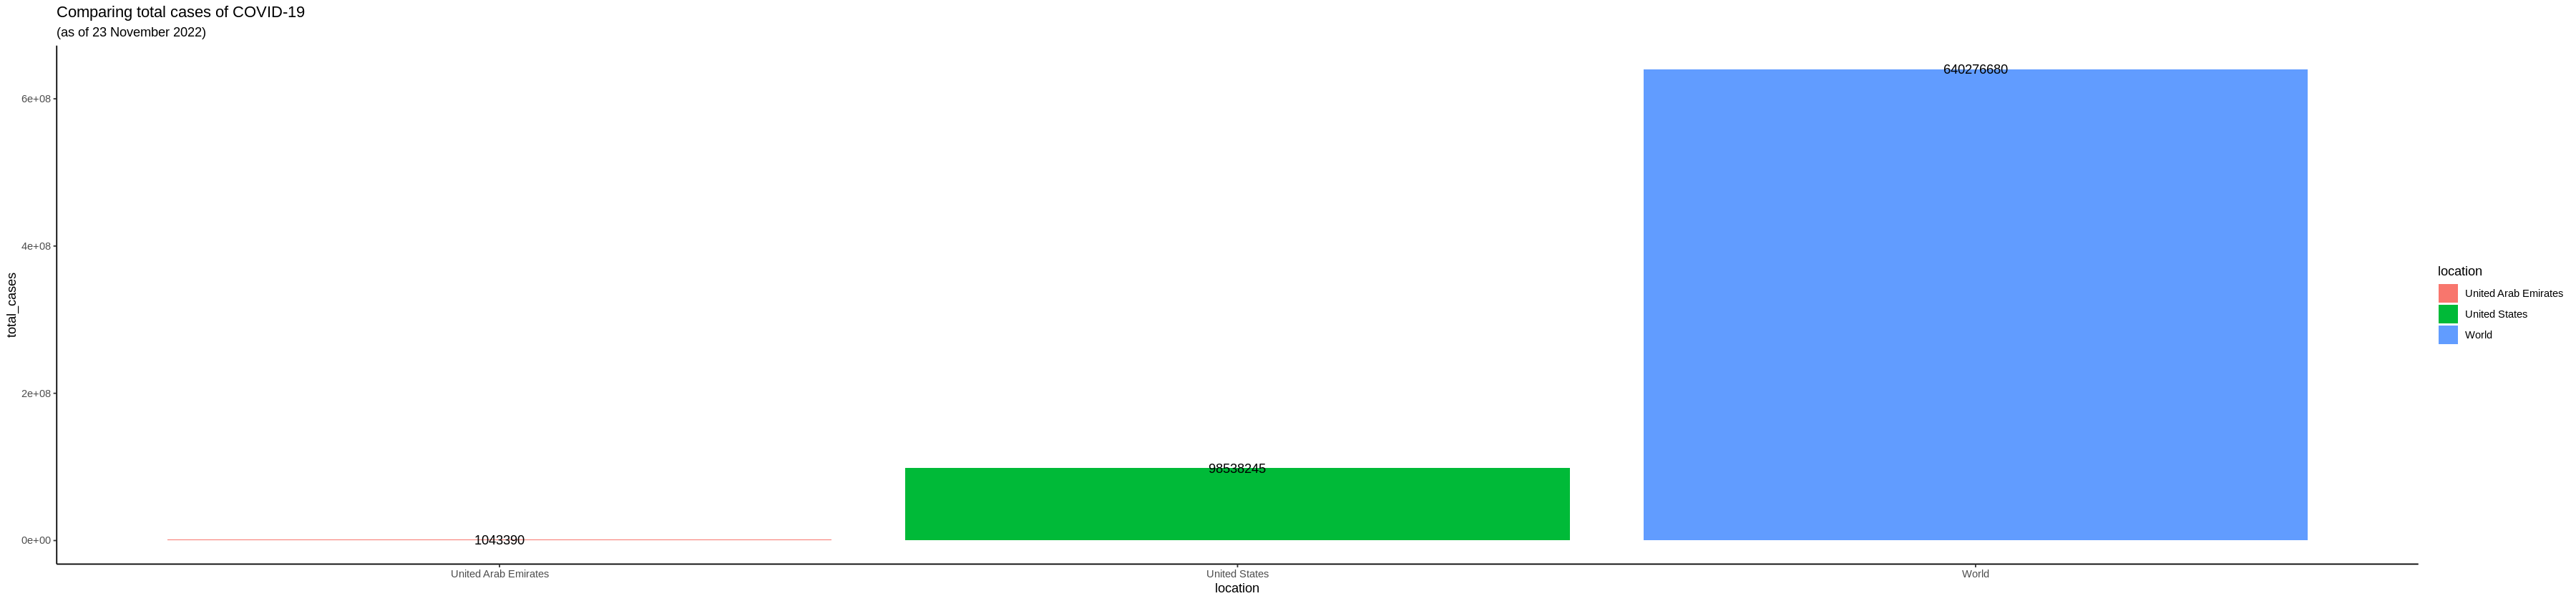

In [ ]:
####GRAPH MORTALITY RATES OF UAE, USA, AND THE WORLD
latest_cases_df %>%
  filter(location == "United States" | location == "United Arab Emirates" | location == "World") %>%
  ggplot(
    aes(x = location, y= total_cases, fill = location)) +
    geom_bar(stat="identity") +
    geom_text(aes(label = total_cases), nudge_y = 30) +
    labs(title ="Comparing total cases of COVID-19", subtitle = "(as of 23 November 2022)") +
    theme_classic()


In [ ]:
# Count the number of locations in the focused_general_df
print(paste("There are", (n_distinct(filter_df$location)), "locations in the dataframe."))

[1] "There are 227 locations in the dataframe."


This is as opposed to how it could be done in Python:

`print(f"There are {filter_df.location.nunique()} locations in the dataframe.")`

# More data exploration

In [ ]:
#now focusing on UAE
covid_uae=covid_csv %>% filter(covid_csv$location=="United Arab Emirates")
#str(covid_uae)
print('Check for null values:')
print(sum(is.na(covid_uae)))

[1] "Check for null values:"
[1] 25472


In [ ]:
filter_df[which.max(filter_df$total_cases),]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
,<chr>,<chr>,<chr>,<date>,<int>,<int>,<int>,<int>
201224,OWID_WRL,,World,2022-11-23,639479824,593528,6625763,2307


In [ ]:
filter[which.max(filter$total_cases),]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
,<chr>,<fct>,<chr>,<date>,<int>,<int>,<int>,<int>
183099,USA,North America,United States,2022-11-23,98503462,111386,1078929,1093


Looks like America has the most number of total cases in the whole dataset.

In [ ]:
top_cases = filter %>% filter(date == "2022-11-23") %>% arrange(-total_cases) %>%
   top_n(total_cases, n=10)

top_cases
print("The top total cases as of November 23, 2022, come from the countries: ")
print(top_cases$location)

iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
<chr>,<fct>,<chr>,<date>,<int>,<int>,<int>,<int>
USA,North America,United States,2022-11-23,98503462,111386,1078929,1093
IND,Asia,India,2022-11-23,44671708,408,530601,5
FRA,Europe,France,2022-11-23,37531910,49188,158580,84
DEU,Europe,Germany,2022-11-23,36318461,38090,157114,163
BRA,South America,Brazil,2022-11-23,35082036,29884,689272,117
KOR,Asia,South Korea,2022-11-23,26784142,59089,30223,59
JPN,Asia,Japan,2022-11-23,24090948,133361,48650,160
GBR,Europe,United Kingdom,2022-11-23,23977637,0,211346,0
RUS,Europe,Russia,2022-11-23,21244991,5591,383728,52


[1] "The top total cases as of November 23, 2022, come from the countries: "
 [1] "United States"  "India"          "France"         "Germany"       
 [5] "Brazil"         "South Korea"    "Japan"          "United Kingdom"
 [9] "Russia"         "Turkey"        


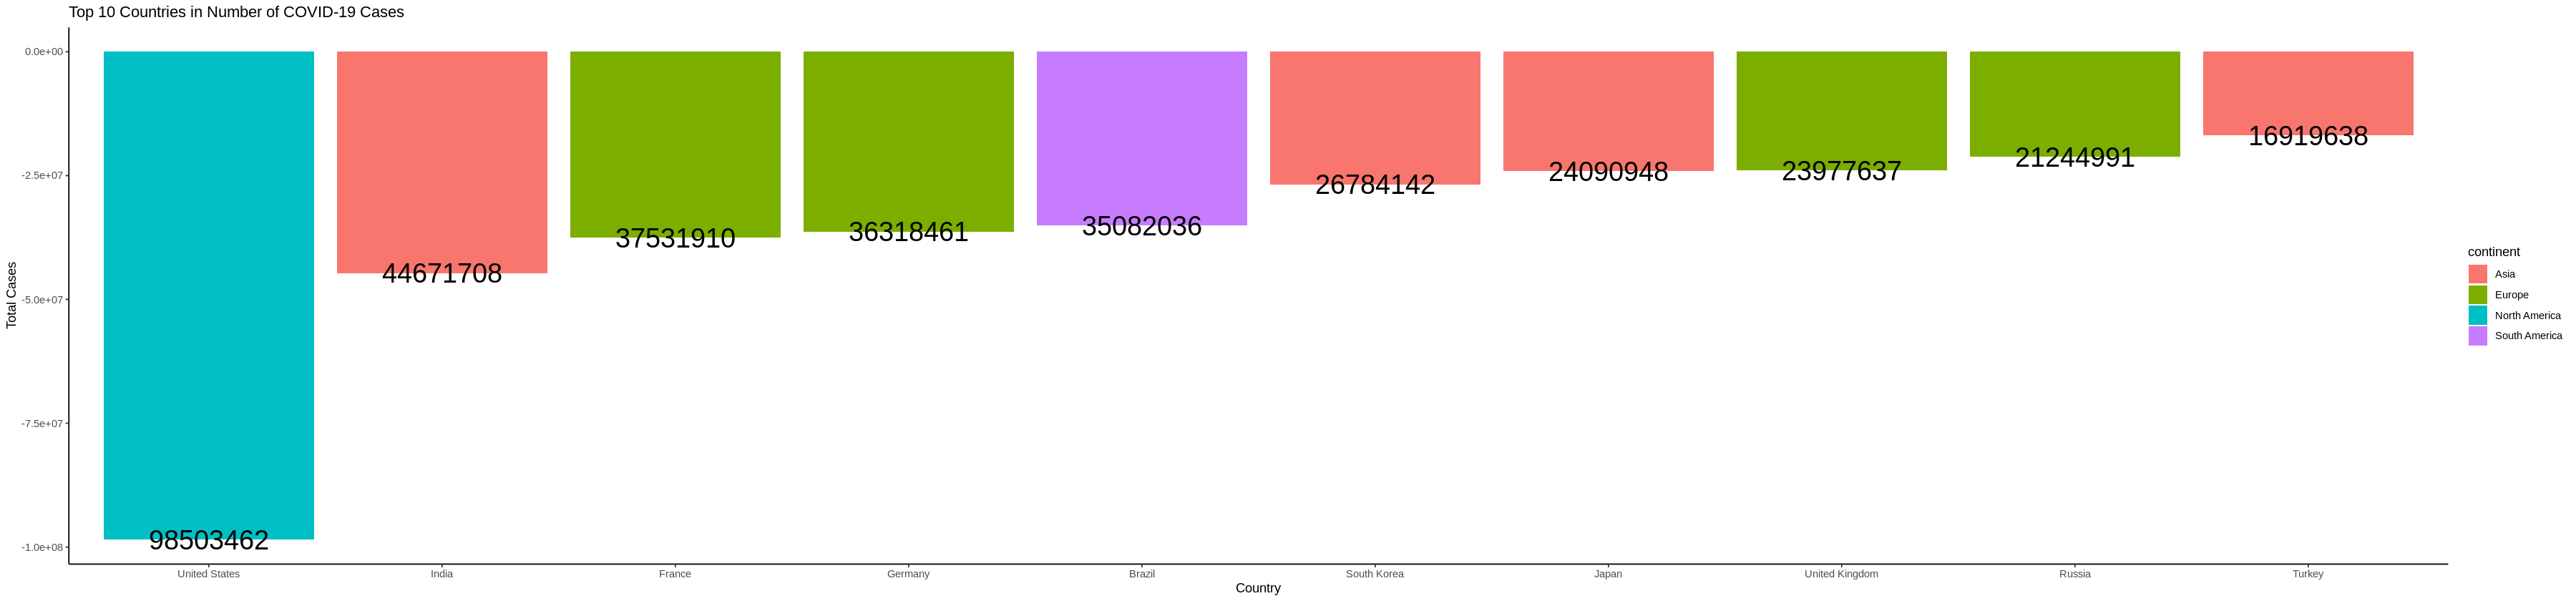

In [ ]:
top_cases %>%
   ggplot(mapping = aes(x= reorder(location, -total_cases), y = -total_cases, fill = continent)) +
  geom_col() +
  theme_classic() +
  ggtitle("Top 10 Countries in Number of COVID-19 Cases")+
  #geom_text(aes(label = location), nudge_y = -100) +
  geom_text(aes(label = round(total_cases,0)), nudge_y = 0, size = 8) +
  xlab("Country")+
  ylab("Total Cases")+
  theme_classic()

I accidentally flipped the axis by putting a negative sign in front of the y variable in the aes() and I kept it just as a discovery and for a change. It doesn't make as much sense with this graph, but I imagine there are certain graphs where it would add another element to the graph by inverting the axis!

I just cannot figure out why nudge_y() is not working in the geom_text() section for labelling the bars. nudge_x() works but not its counterpount for y.

#Studying only certain variables

In [ ]:
covid_csv %>% str()
covid_csv$date = as.Date(covid_csv$date, format = "%m/%d/%Y")

'data.frame':	237477 obs. of  67 variables:
 $ iso_code                                  : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ continent                                 : chr  "Asia" "Asia" "Asia" "Asia" ...
 $ location                                  : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ date                                      : chr  "2/24/2020" "2/25/2020" "2/26/2020" "2/27/2020" ...
 $ total_cases                               : int  5 5 5 5 5 5 5 5 5 5 ...
 $ new_cases                                 : int  5 0 0 0 0 0 0 0 0 0 ...
 $ new_cases_smoothed                        : num  NA NA NA NA NA 0.714 0.714 0 0 0 ...
 $ total_deaths                              : int  NA NA NA NA NA NA NA NA NA NA ...
 $ new_deaths                                : int  NA NA NA NA NA NA NA NA NA NA ...
 $ new_deaths_smoothed                       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ total_cases_per_million                   : num  0.122 0.122 0.122 0.122 0

In [ ]:
#columns of interest
columns = c("continent", "location", "date", "total_cases", "total_deaths", "tests_per_case", "people_fully_vaccinated", "total_vaccinations_per_hundred",
"population_density", "median_age", "aged_65_older", "gdp_per_capita", "extreme_poverty", "hospital_beds_per_thousand",
 "population")


In [ ]:
 #keeping selected columns
 df <- covid_csv %>% select(columns) %>%
  filter(date == latest_date)

In [ ]:
str(df)

'data.frame':	231 obs. of  15 variables:
 $ continent                     : chr  "Asia" "" "Europe" "Africa" ...
 $ location                      : chr  "Afghanistan" "Africa" "Albania" "Algeria" ...
 $ date                          : Date, format: "2022-11-24" "2022-11-24" ...
 $ total_cases                   : int  205506 12417641 333305 271050 46824 104491 3904 9106 9723924 445631 ...
 $ total_deaths                  : int  7833 257265 3594 6881 156 1923 12 146 130017 8709 ...
 $ tests_per_case                : num  NA NA NA NA NA NA NA NA NA NA ...
 $ people_fully_vaccinated       : num  NA 3.61e+08 NA NA NA ...
 $ total_vaccinations_per_hundred: num  NA 48.3 NA NA NA ...
 $ population_density            : num  54.4 NA 104.9 17.3 163.8 ...
 $ median_age                    : num  18.6 NA 38 29.1 NA 16.8 NA 32.1 31.9 35.7 ...
 $ aged_65_older                 : num  2.58 NA 13.19 6.21 NA ...
 $ gdp_per_capita                : num  1804 NA 11803 13914 NA ...
 $ extreme_poverty         

In [ ]:
ages = df %>% select(location, median_age) %>% drop_na()
print(paste("The average age of someone with a case of COVID-19 is", round(mean(ages$median_age),1), "years old"))

[1] "The average age of someone with a case of COVID-19 is 30.3 years old"


In [ ]:
gdp = df %>% select(continent, location, gdp_per_capita) %>% drop_na() %>%
  filter(continent!="") %>%
  group_by(continent) %>%
  summarize(avg_gdp=round(mean(gdp_per_capita),2))

gdp

continent,avg_gdp
<chr>,<dbl>
Africa,5443.84
Asia,24718.97
Europe,33360.62
North America,20532.79
Oceania,10617.62
South America,13840.79


In [ ]:
#using group_by() and summarize() together to find mortality rate across continents
 df %>% filter(continent!="") %>%
  filter(date == latest_date) %>%
  select(continent, location, total_cases, total_deaths) %>% drop_na() %>%
  group_by(continent) %>%
  summarize(mortality=round(mean(total_deaths/total_cases),3)) %>%
  arrange(-mortality)

continent,mortality
<chr>,<dbl>
Asia,0.136
South America,0.021
Africa,0.018
North America,0.012
Europe,0.009
Oceania,0.004


In [ ]:
#world

world <- df %>%
  select(continent, location, total_cases, total_deaths) %>%
    filter(continent == "") %>%
    drop_na() %>%
    filter(location == "World")

  print(paste("Mortality rate of the world overall: ", round(world$total_deaths/world$total_cases,4)))

[1] "Mortality rate of the world overall:  0.0104"


In [ ]:
uae_mortality <- df %>% filter(continent!="") %>%
  filter(date == latest_date) %>%
  filter(location=="United Arab Emirates") %>%
  select(continent, location, total_cases, total_deaths) %>% drop_na() %>%
  summarize(mortality=mean(total_deaths/total_cases))

print(paste("Mortality rate of the UAE: ", round(uae_mortality,4)))

[1] "Mortality rate of the UAE:  0.0023"


In [ ]:
#what are the highest mortality rates in countries overall?
df %>% filter(continent!="") %>%
  filter(date == latest_date) %>%
  select(continent, location, total_cases, total_deaths) %>% drop_na() %>%
  group_by(location) %>%
  summarize(mortality=total_deaths/total_cases) %>%
  arrange(-mortality) %>%
  top_n(n=8)

Selecting by mortality


location,mortality
<chr>,<dbl>
North Korea,6.00000000
Yemen,0.18074508
Sudan,0.07841350
Syria,0.05511221
Peru,0.05161969
Somalia,0.04987906
Egypt,0.04809123
Mexico,0.04638412


This Korea number is looking very suspicious. I estimate that there is a reporting error here. Looking at the rest of the countries, notice that two are in Asia (the Middle East to be specific), three in Africa, one in North America, and one in South America.

In [ ]:
#what are the lowest mortality rates in countries?
df %>% filter(continent!="") %>%
  filter(date == latest_date) %>%
  select(continent, location, total_cases, total_deaths) %>% drop_na() %>%
  group_by(location) %>%
  summarize(mortality=round(total_deaths/total_cases,6)) %>%
  arrange(-mortality) %>%
  top_n(n=-8)

Selecting by mortality


location,mortality
<chr>,<dbl>
Faeroe Islands,0.000808
Singapore,0.000787
Burundi,0.000748
Tonga,0.000742
Bhutan,0.000336
Saint Pierre and Miquelon,0.000308
Nauru,0.000216
Cook Islands,0.000157


The countries with the lowest mortality rates feature a number of islands, which makes sense because they are more easier able to self-isolate and they have a smaller population anyway to begin with, which makes it easier to control the pandemic.

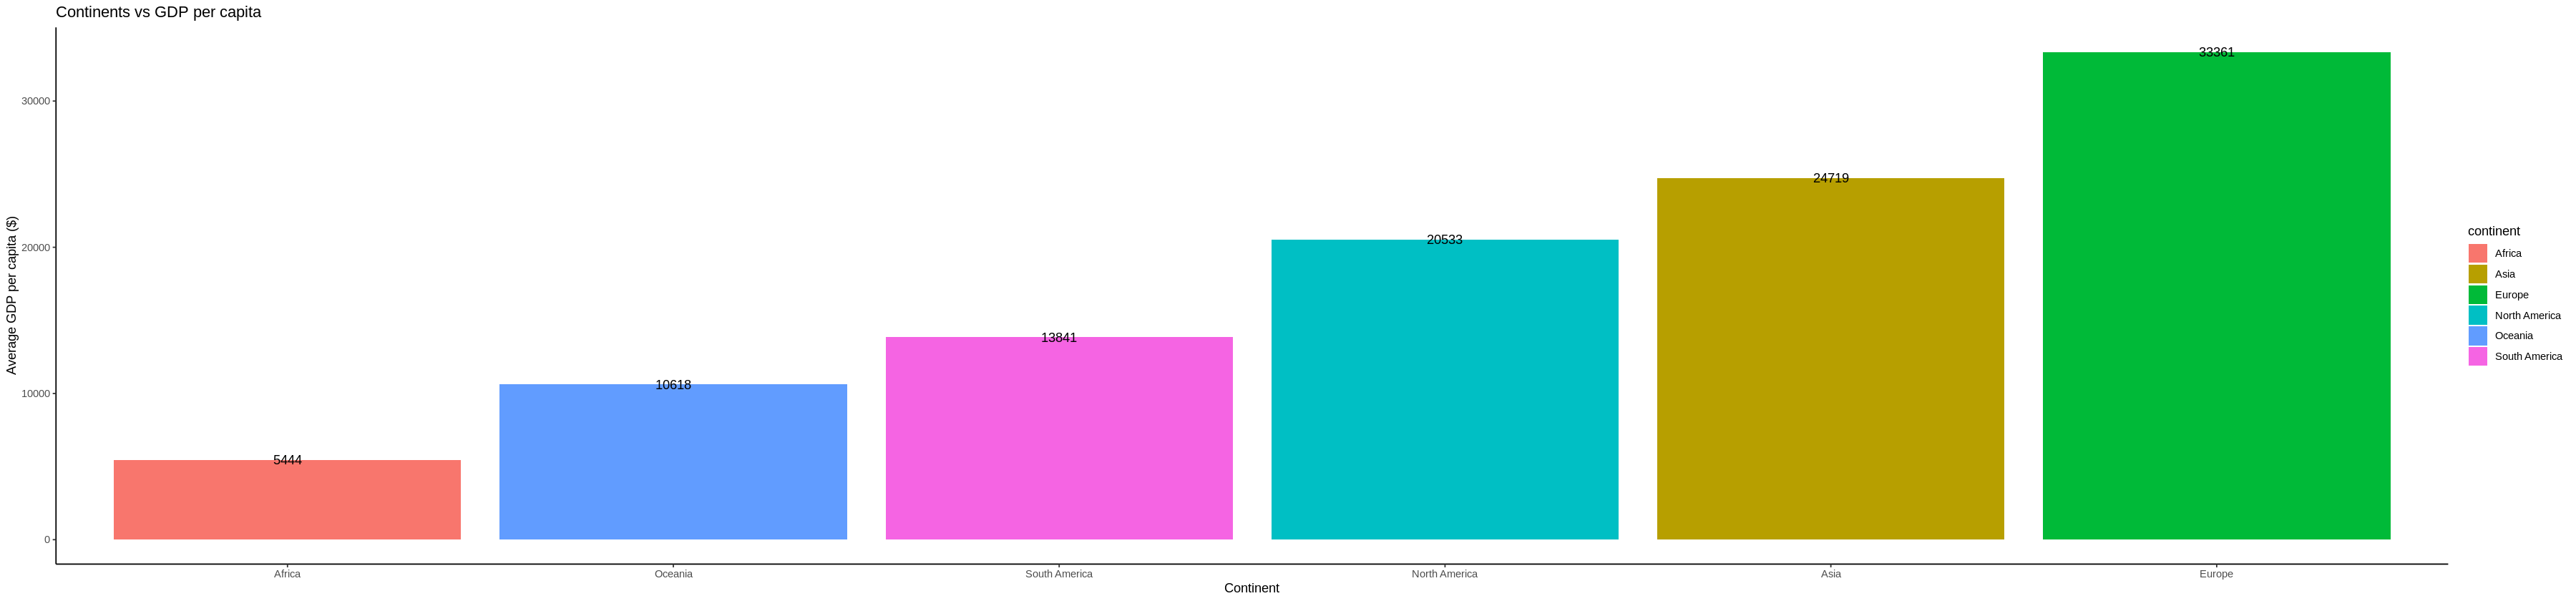

In [ ]:
#Now why is this exactly? Lets look at some of the other variables to compare and see if there are any correlations.
gdp %>%
  filter(continent!="") %>%
  arrange(-avg_gdp) %>%
  ggplot(mapping = aes(x= reorder(continent, avg_gdp), y = avg_gdp, fill = continent)) +
  geom_col() +
  theme_classic() +
  ggtitle("Continents vs GDP per capita")+
  xlab("Continent")+ ylab("Average GDP per capita ($)")+
  geom_text(aes(label = round(avg_gdp,0)), nudge_y = 10) +
    theme_classic()

Selecting by gdp


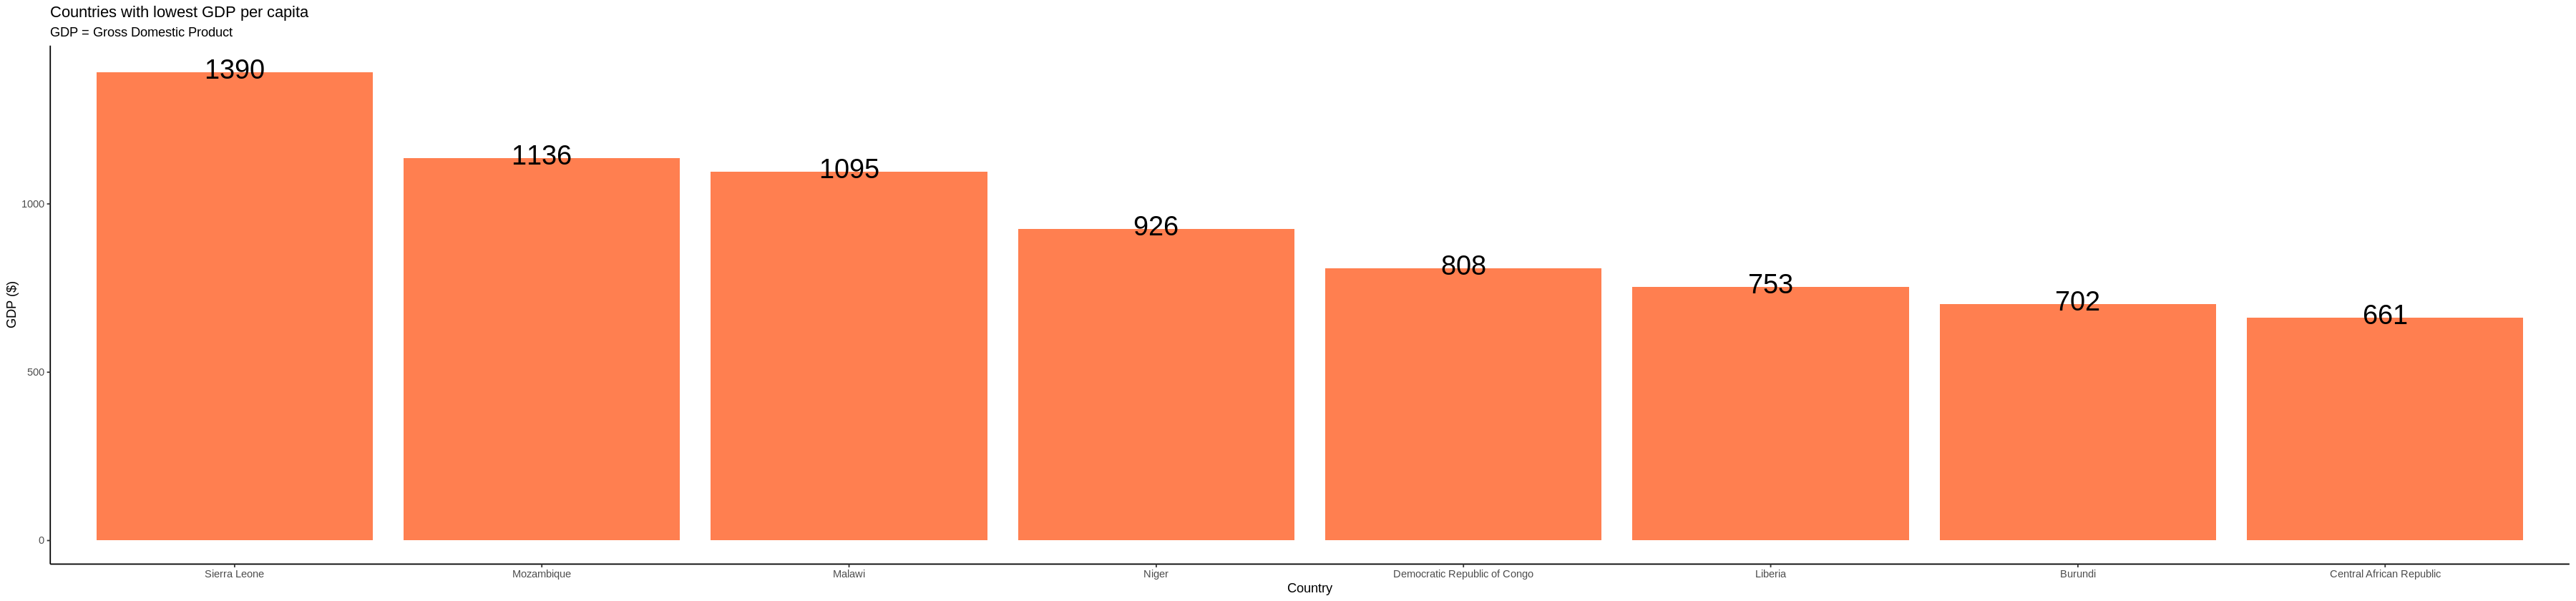

In [ ]:
#what are the lowest gdp in countries?
df %>% filter(continent!="") %>%
  filter(date == latest_date) %>%
  select(continent, location,gdp_per_capita) %>% drop_na() %>%
  group_by(location) %>%
  summarize(gdp=gdp_per_capita) %>%
  arrange(-gdp) %>%
  top_n(n=-8) %>%

  ggplot(aes(x= reorder(location, -gdp), y=gdp, fill = "africa")) +
    geom_col(fill="coral") +
    theme_classic() +
    ggtitle("Countries with lowest GDP per capita")+
    labs(subtitle = "GDP = Gross Domestic Product")+
    xlab("Country")+ ylab("GDP ($)")+
    geom_text(aes(label = round(gdp,0)), nudge_y = 10, size=8)


I notice that all of these countries are in Africa. I would've expected these same counties to also be in othe list of countries highest affected by COVID-19 as well, but they are not all present in the very bottom 8.

In [ ]:
df %>% filter(continent!="") %>%
  filter(date == latest_date) %>%
  select(continent, location, gdp_per_capita) %>% drop_na() %>%
  group_by(location) %>%
  arrange(gdp_per_capita) %>%
  top_n(n=8)

Selecting by gdp_per_capita


continent,location,gdp_per_capita
<chr>,<chr>,<dbl>
Africa,Central African Republic,661.240
Africa,Burundi,702.225
Africa,Liberia,752.788
Africa,Democratic Republic of Congo,808.133
Africa,Niger,926.000
Africa,Malawi,1095.042
Africa,Mozambique,1136.103
Africa,Sierra Leone,1390.300
Africa,Comoros,1413.890


In [ ]:
str(df)

'data.frame':	231 obs. of  15 variables:
 $ continent                     : chr  "Asia" "" "Europe" "Africa" ...
 $ location                      : chr  "Afghanistan" "Africa" "Albania" "Algeria" ...
 $ date                          : Date, format: "2022-11-24" "2022-11-24" ...
 $ total_cases                   : int  205506 12417641 333305 271050 46824 104491 3904 9106 9723924 445631 ...
 $ total_deaths                  : int  7833 257265 3594 6881 156 1923 12 146 130017 8709 ...
 $ tests_per_case                : num  NA NA NA NA NA NA NA NA NA NA ...
 $ people_fully_vaccinated       : num  NA 3.61e+08 NA NA NA ...
 $ total_vaccinations_per_hundred: num  NA 48.3 NA NA NA ...
 $ population_density            : num  54.4 NA 104.9 17.3 163.8 ...
 $ median_age                    : num  18.6 NA 38 29.1 NA 16.8 NA 32.1 31.9 35.7 ...
 $ aged_65_older                 : num  2.58 NA 13.19 6.21 NA ...
 $ gdp_per_capita                : num  1804 NA 11803 13914 NA ...
 $ extreme_poverty         

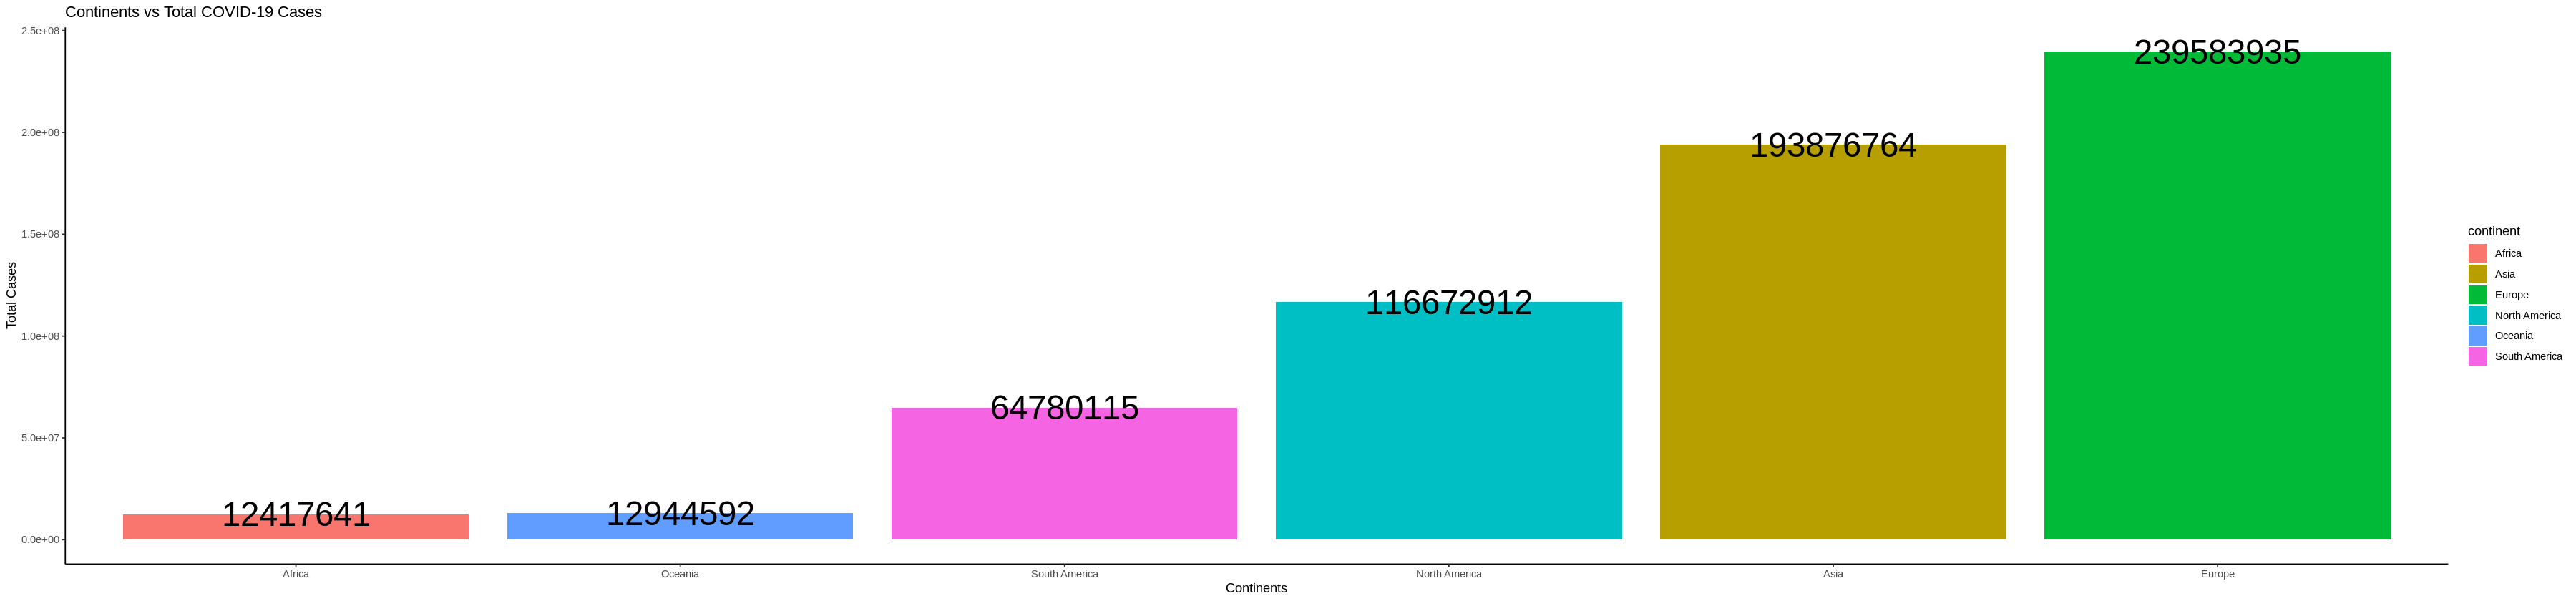

In [ ]:
df %>% select(continent, location, total_cases) %>% drop_na() %>%
  group_by(continent) %>%
  filter(continent!="") %>%
  summarize(total=sum(total_cases)) %>%
  arrange(-total) %>%
  ggplot(mapping = aes(x= reorder(continent,total), y = total, fill = continent)) +
  geom_col() +
  theme_classic() +
  ggtitle("Continents vs Total COVID-19 Cases") +
    geom_text(aes(label = round(total,0)), nudge_y = 15, size=10)+
  xlab("Continents")+ ylab("Total Cases")

Here is a clear example of one of my frustrations with graphing. I used the arrange() function so that the bars on the graph would look more aesthetically pleasing going in order, but it refuses to work and instead is listing them by alphabetical order of continent. The bars look choppy. I know that arrange() SHOULD work because it properly arranges the table.


*edit*: i later found out that instead of using arrange(), which does arrange the table in order specified, it does not work for graphs. Instead, we must use reorder() in the mapping to detrmine order of bars.

Patience is a virtue.

Now I will look at total vaccinations per hundred people.

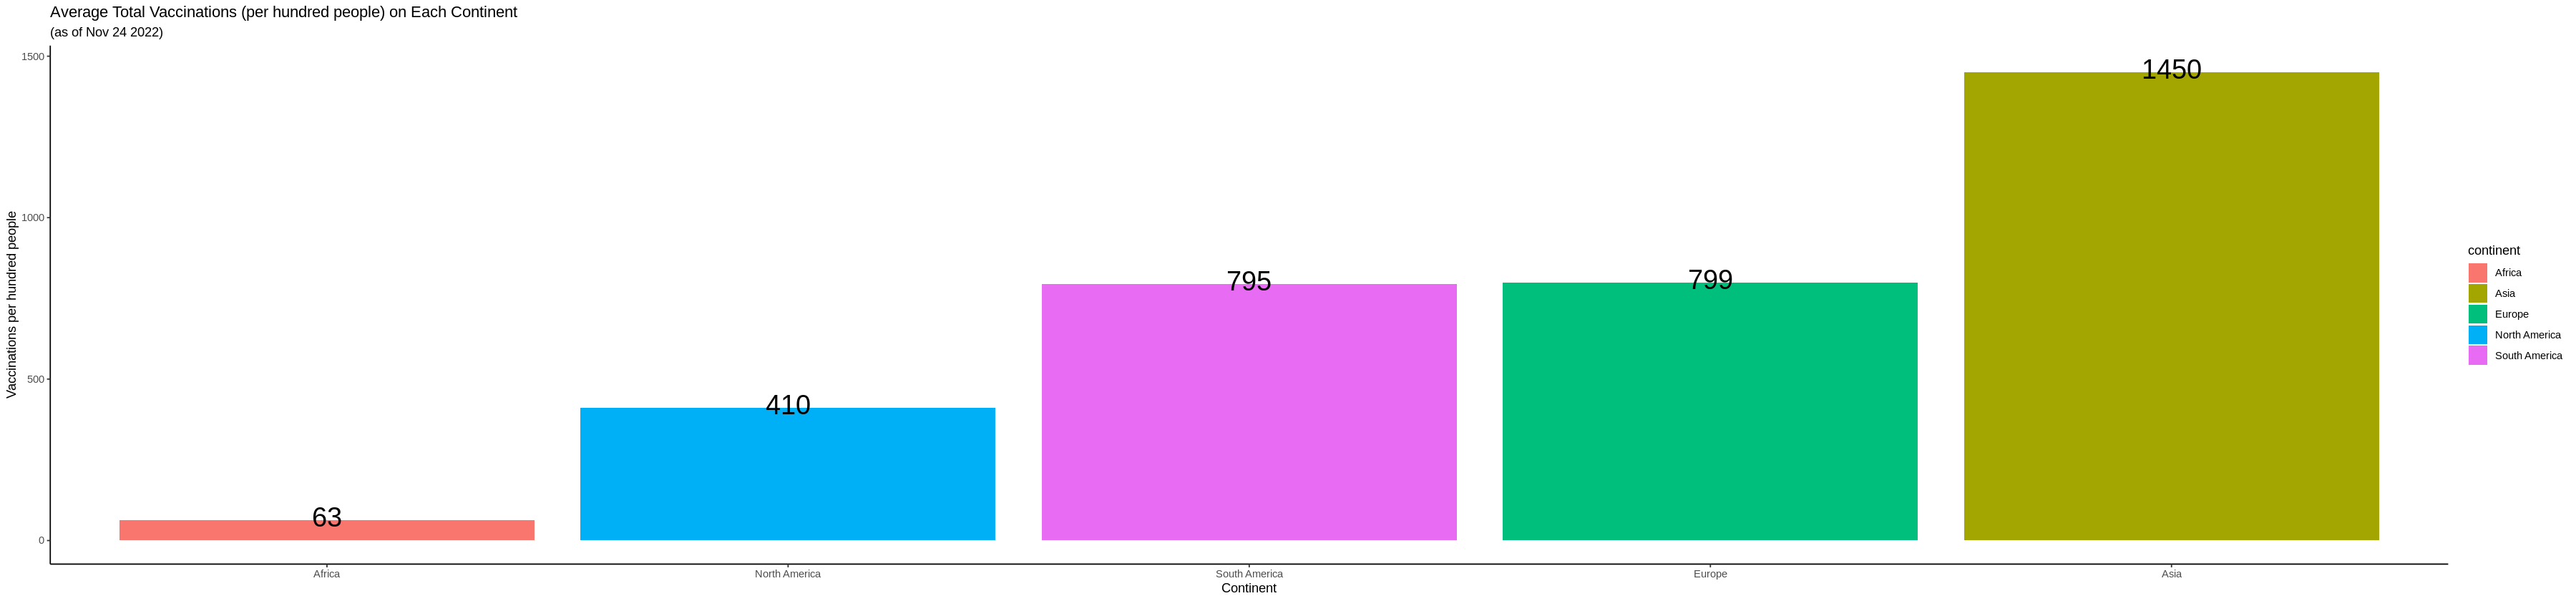

In [ ]:
df %>% select(continent, location, total_vaccinations_per_hundred) %>% drop_na() %>%
  group_by(continent) %>%
   filter(continent!="") %>%
  summarize(total=sum(total_vaccinations_per_hundred)) %>%
  arrange(-total) %>%
  ggplot(mapping = aes(x= reorder(continent,total), y = total, fill = continent)) +
  geom_col() +
  theme_classic() +
  ggtitle("Average Total Vaccinations (per hundred people) on Each Continent") +
  geom_text(aes(label = round(total,0)), nudge_y = 10, size= 8) +
  xlab("Continent") + ylab("Vaccinations per hundred people")+
  labs(subtitle = "(as of Nov 24 2022)")

This is consistent with many Asian countires being stricter with COVID-19 guidelines and having vaccination requirements.

# **Cases in UAE vs USA**

In [ ]:
covid_csv %>%
           filter(location=="United Arab Emirates" | location == "United States") %>%
           select(continent, location, date, new_cases_per_million, icu_patients_per_million, weekly_hosp_admissions_per_million)

continent,location,date,new_cases_per_million,icu_patients_per_million,weekly_hosp_admissions_per_million
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>
Asia,United Arab Emirates,2020-01-29,0.424,NA,NA
Asia,United Arab Emirates,2020-01-30,0.000,NA,NA
Asia,United Arab Emirates,2020-01-31,0.000,NA,NA
Asia,United Arab Emirates,2020-02-01,0.000,NA,NA
Asia,United Arab Emirates,2020-02-02,0.106,NA,NA
Asia,United Arab Emirates,2020-02-03,0.000,NA,NA
Asia,United Arab Emirates,2020-02-04,0.000,NA,NA
Asia,United Arab Emirates,2020-02-05,0.000,NA,NA
Asia,United Arab Emirates,2020-02-06,0.000,NA,NA


Looking through the above table, I had to remove these variables : ```icu_patients_per_million``` and ``` weekly_hosp_admissions_per_million ``` because for the USA, there were values, but for UAE, there was no reporting for this metric. It was all Na's.


I was really looking forward to comparing these numbers because I like how they are adjusted "per million", which means the proportions will make more sense to compare.

In [ ]:
#cases in the USA vs UAE
covid_csv %>%
  select(location, total_cases, total_deaths, total_deaths_per_million, total_vaccinations_per_hundred,
  new_vaccinations_smoothed_per_million,population_density,hospital_beds_per_thousand, extreme_poverty,
    gdp_per_capita, aged_65_older) %>%
      filter(location == "United States" | location == "United Arab Emirates") %>%
        na.omit() %>%
      group_by(location) %>%
      summarize(sum = sum(total_deaths_per_million))


location,sum
<chr>,<dbl>
United States,1619072


The above code is one way I realized there were many NAs in UAE part of the data, because only USA would show any numbers in the final table. After this, I go back and look to see exactly which variables had all the Nas in it and removed them so I would still be able to manipulate the data.

Next, I wanted to use the date variable and look at cases over time.

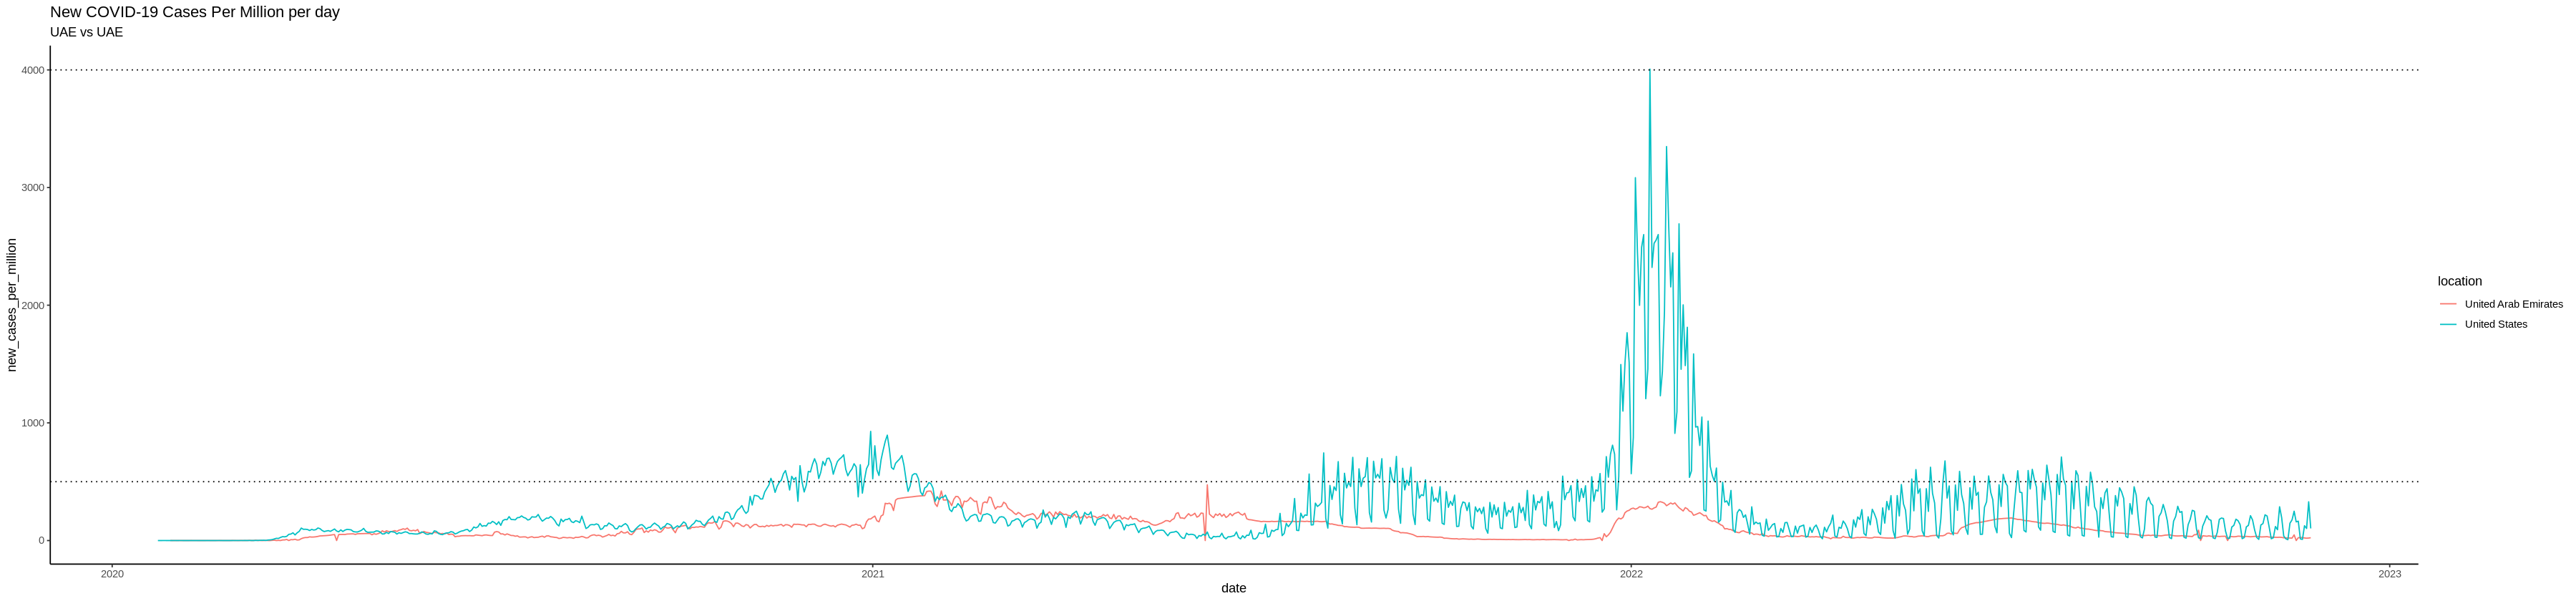

In [ ]:
covid_csv %>%
           filter(location=="United Arab Emirates" | location == "United States") %>%
           select(continent, location, date, new_cases_per_million) %>%
           na.omit() %>%

          ggplot(aes(x=date, y= new_cases_per_million)) +
              geom_line(aes(color = location)) +
              #geom_smooth(method = "loess") +
              ggtitle("New COVID-19 Cases Per Million per day")+
              labs(subtitle = "UAE vs UAE")+
              geom_hline(yintercept = 500,linetype = 'dotted', col = 'black') +
              geom_hline(yintercept = 4000, linetype = 'dotted', col = 'black') +
              theme_classic()


In [ ]:
vs <- covid_csv %>%
  select(date, location, total_cases, total_deaths, total_deaths_per_million, total_vaccinations_per_hundred,
  new_vaccinations_smoothed_per_million,population_density, hospital_beds_per_thousand, extreme_poverty,
    gdp_per_capita, aged_65_older) %>%
      filter(location == "United States" | location == "United Arab Emirates")


`"vs"` as in America VS the UAE.

In [ ]:
glimpse(vs)

Rows: 2,069
Columns: 12
$ date                                  <date> 2020-01-29, 2020-01-30, 2020-01…
$ location                              <chr> "United Arab Emirates", "United …
$ total_cases                           <int> 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 7,…
$ total_deaths                          <int> NA, NA, NA, NA, NA, NA, NA, NA, …
$ total_deaths_per_million              <dbl> NA, NA, NA, NA, NA, NA, NA, NA, …
$ total_vaccinations_per_hundred        <dbl> NA, NA, NA, NA, NA, NA, NA, NA, …
$ new_vaccinations_smoothed_per_million <int> NA, NA, NA, NA, NA, NA, NA, NA, …
$ population_density                    <dbl> 112.442, 112.442, 112.442, 112.4…
$ hospital_beds_per_thousand            <dbl> 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.…
$ extreme_poverty                       <dbl> NA, NA, NA, NA, NA, NA, NA, NA, …
$ gdp_per_capita                        <dbl> 67293.48, 67293.48, 67293.48, 67…
$ aged_65_older                         <dbl> 1.144, 1.144, 1.144, 1.144, 1.14…


In [ ]:
#selecting the columns with 0 null values.
sum(is.na(vs$hospital_beds_per_thousand))
sum(is.na(vs$new_vaccinations_smoothed_per_million))
sum(is.na(vs$total_deaths_per_million))
sum(is.na(vs$total_vaccinations_per_hundred))
sum(is.na(vs$population_density))
sum(is.na(vs$extreme_poverty))
sum(is.na(vs$gdp_per_capita))
sum(is.na(vs$aged_65_older))
sum(is.na(vs$population_density))
sum(is.na(vs$total_cases))
sum(is.na(vs$total_deaths))
sum(is.na(vs$total_deaths_per_million))

[1] 0

[1] 836

[1] 89

[1] 991

[1] 0

[1] 1031

[1] 0

[1] 0

[1] 0

[1] 0

[1] 89

[1] 89

In [ ]:
#selecting variables
vs <- vs %>%
  select(date, location, total_cases, total_deaths, total_deaths_per_million, hospital_beds_per_thousand,
  population_density, gdp_per_capita, aged_65_older ) %>%
    na.omit()

In [ ]:
str(vs)

'data.frame':	1980 obs. of  9 variables:
 $ date                      : Date, format: "2020-03-20" "2020-03-21" ...
 $ location                  : chr  "United Arab Emirates" "United Arab Emirates" "United Arab Emirates" "United Arab Emirates" ...
 $ total_cases               : int  140 153 153 198 248 333 333 405 468 570 ...
 $ total_deaths              : int  2 2 2 2 2 2 2 2 2 3 ...
 $ total_deaths_per_million  : num  0.212 0.212 0.212 0.212 0.212 0.212 0.212 0.212 0.212 0.318 ...
 $ hospital_beds_per_thousand: num  1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 ...
 $ population_density        : num  112 112 112 112 112 ...
 $ gdp_per_capita            : num  67293 67293 67293 67293 67293 ...
 $ aged_65_older             : num  1.14 1.14 1.14 1.14 1.14 ...
 - attr(*, "na.action")= 'omit' Named int [1:89] 1 2 3 4 5 6 7 8 9 10 ...
  ..- attr(*, "names")= chr [1:89] "1" "2" "3" "4" ...


In [ ]:
#factoring the location so hopefully in the graphs I can do more with it.
vs <- vs %>%
  filter(date == latest_date)

  vs$location = factor(vs$location)

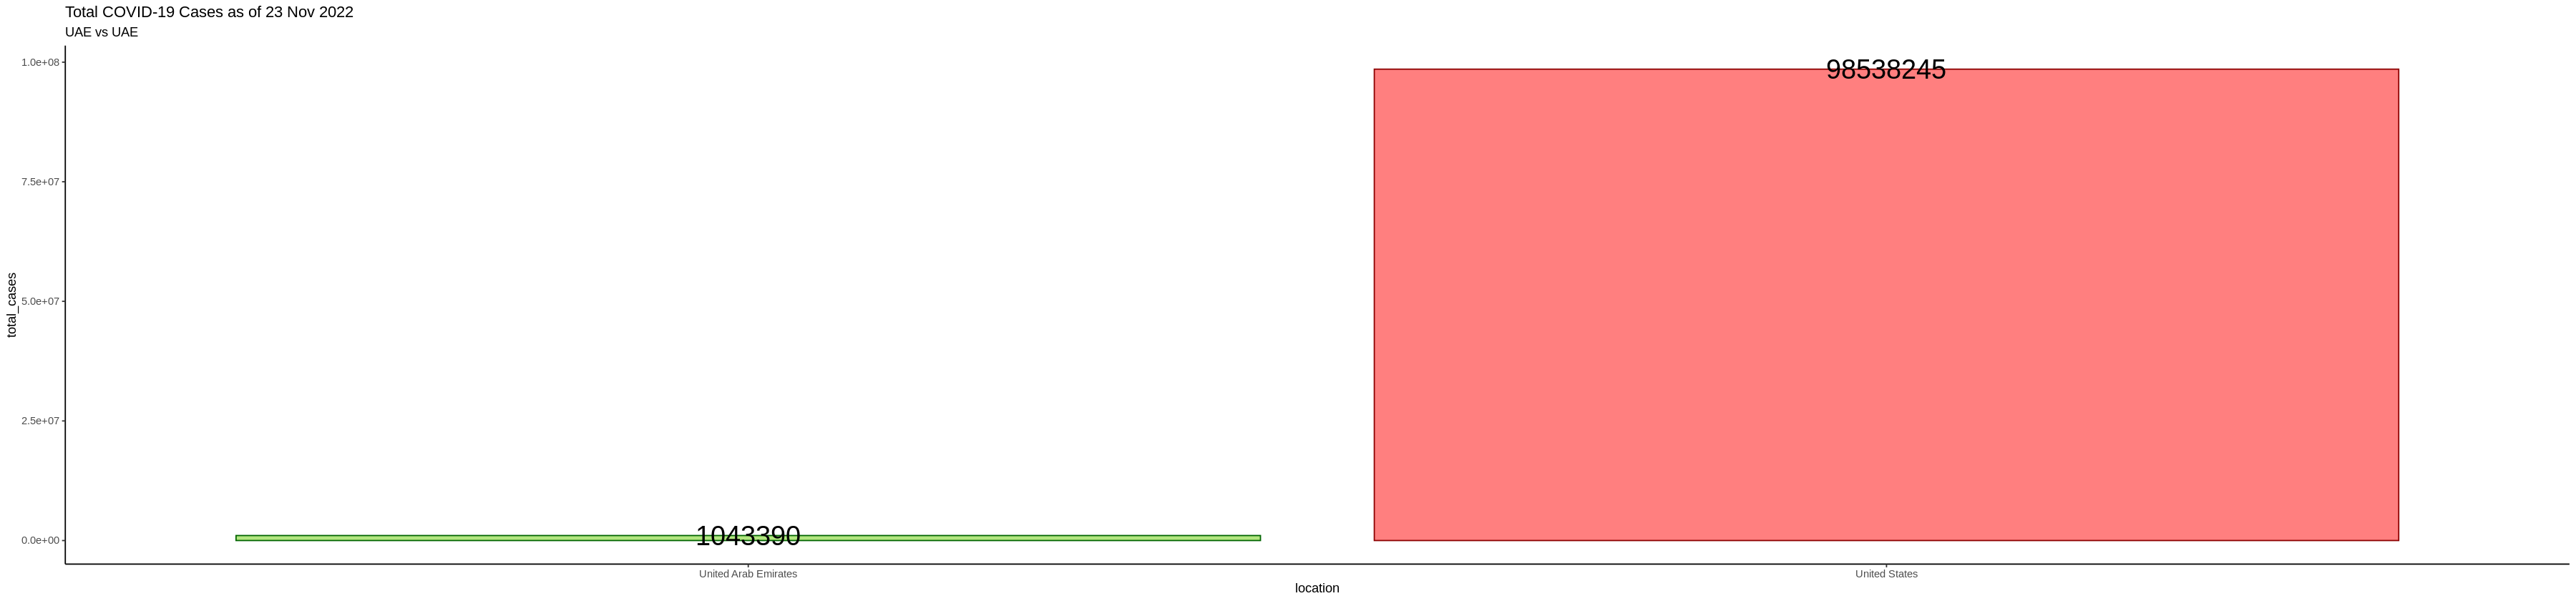

In [ ]:
#Graphing total cases in UAE and USA till date.

vs %>%
  ggplot(aes(x = location, y= total_cases, fill = location)) +
    geom_col( col=c("darkgreen", "darkred"), fill=c("chartreuse3", "red"),alpha=.5) +
     ggtitle("Total COVID-19 Cases as of 23 Nov 2022")+
              labs(subtitle = "UAE vs UAE")+
                geom_text(aes(label = round(total_cases,0)), nudge_y = 10, size= 8) +
              theme_classic()#+
   # geom_col(aes(x= location, y = total_deaths, color = location))

In the following few blocks, I will be trying to "flip" the data. Right now it is a wide dataset, and my goal is to make it into a long dataset. I believe that it will help me in graphing. I'll be able to include more data in one graph using factors, so I can use position="dodge" in my bar graphs. This is my current vision.

In [ ]:
#The function t() is for transposing the data
vs_t = vs %>% t()

In [ ]:
str(vs_t)

 chr [1:9, 1:2] "2022-11-24" "United Arab Emirates" " 1043390" "   2348" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:9] "date" "location" "total_cases" "total_deaths" ...
  ..$ : NULL


In [ ]:
vs_t

date,2022-11-24,2022-11-24
location,United Arab Emirates,United States
total_cases,1043390,98538245
total_deaths,2348,1079052
total_deaths_per_million,248.699,3189.726
hospital_beds_per_thousand,1.20,2.77
population_density,112.442,35.608
gdp_per_capita,67293.48,54225.45
aged_65_older,1.144,15.413


In [ ]:
df_1 = vs
df2 <- data.frame(t(df_1[-1]))
colnames(df2) <- df_1[, 1]

In [ ]:
df2

,2022-11-24,2022-11-24
,<chr>,<chr>
location,United Arab Emirates,United States
total_cases,1043390,98538245
total_deaths,2348,1079052
total_deaths_per_million,248.699,3189.726
hospital_beds_per_thousand,1.20,2.77
population_density,112.442,35.608
gdp_per_capita,67293.48,54225.45
aged_65_older,1.144,15.413


In [ ]:
as.numeric(df2$total_cases)
str(df2)
#this is just turning many data entries into NAs.

numeric(0)

'data.frame':	8 obs. of  2 variables:
 $ 2022-11-24: chr  "United Arab Emirates" " 1043390" "   2348" " 248.699" ...
 $ 2022-11-24: chr  "United States" "98538245" "1079052" "3189.726" ...


This is leading into more problems such as switching data types, making everything homogenous (for example, a string and a number being together in the same column, both as characters... it's hard to manipulate the whole column now.


# ***graphs***

In [ ]:
vs %>% str()

'data.frame':	2 obs. of  9 variables:
 $ date                      : Date, format: "2022-11-24" "2022-11-24"
 $ location                  : Factor w/ 2 levels "United Arab Emirates",..: 1 2
 $ total_cases               : int  1043390 98538245
 $ total_deaths              : int  2348 1079052
 $ total_deaths_per_million  : num  249 3190
 $ hospital_beds_per_thousand: num  1.2 2.77
 $ population_density        : num  112.4 35.6
 $ gdp_per_capita            : num  67293 54225
 $ aged_65_older             : num  1.14 15.41
 - attr(*, "na.action")= 'omit' Named int [1:89] 1 2 3 4 5 6 7 8 9 10 ...
  ..- attr(*, "names")= chr [1:89] "1" "2" "3" "4" ...


In [ ]:
#Trying out a table but this was not helpful.
table(vs$total_cases,vs$total_deaths)

          
           2348 1079052
  1043390     1       0
  98538245    0       1

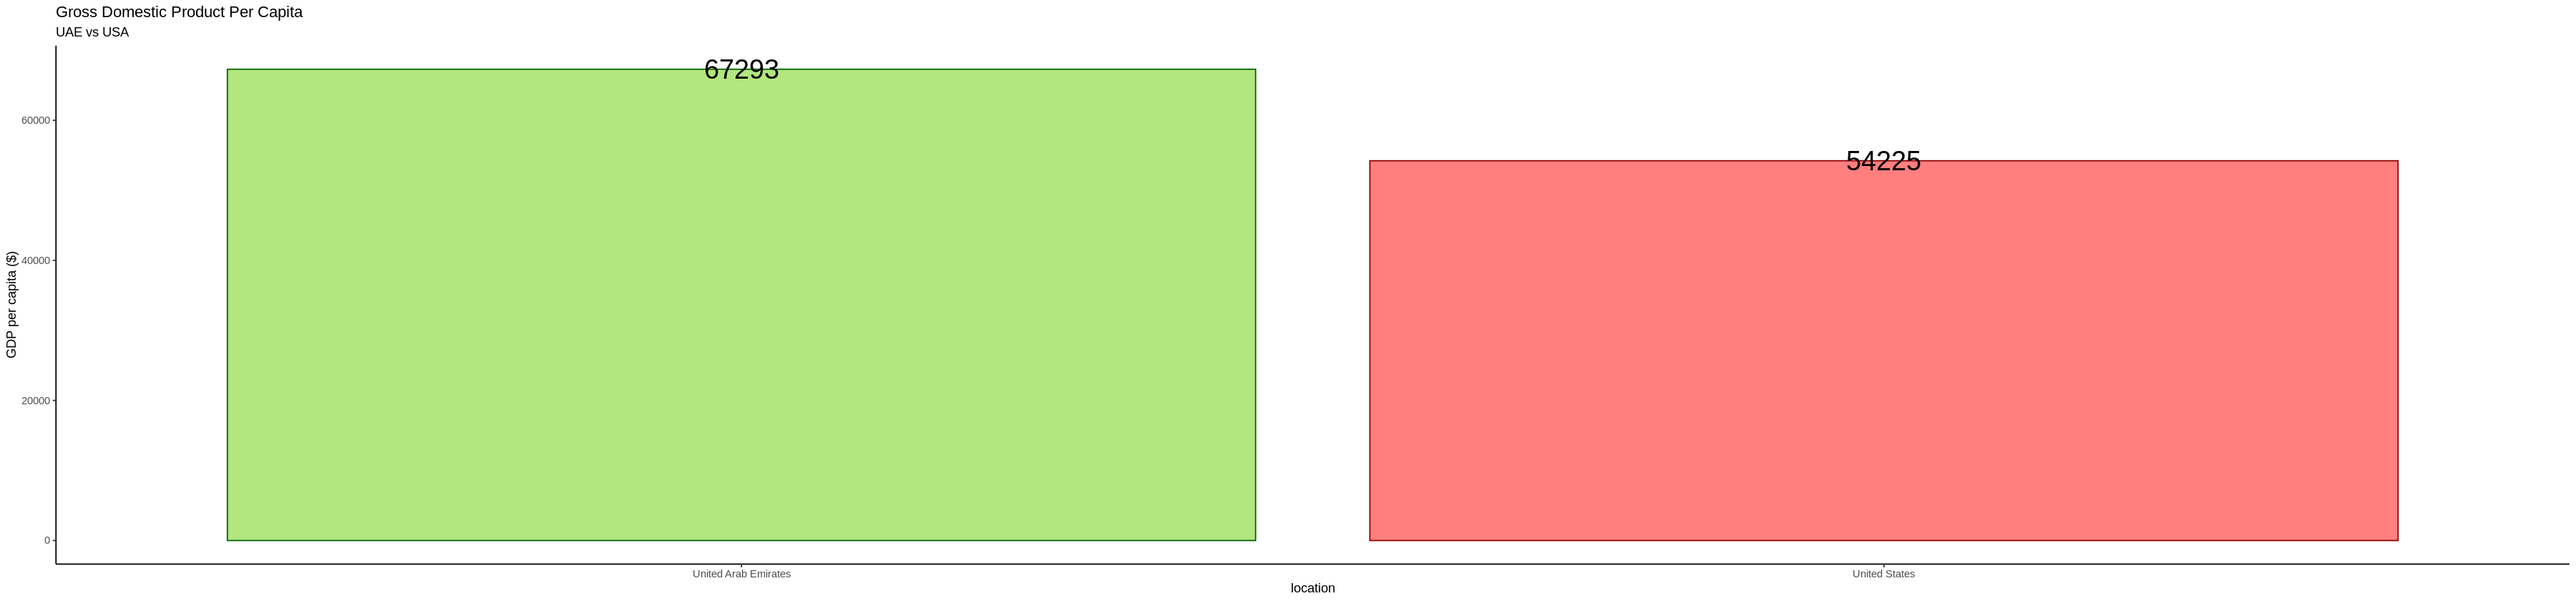

In [ ]:
vs %>%
  ggplot(aes(y = gdp_per_capita, x=location, fill = location)) +
    geom_bar(stat="identity", position = "dodge", col=c("darkgreen", "darkred"), fill=c("chartreuse3", "red"),alpha=.5) +
    theme_classic() +
    ggtitle("Gross Domestic Product Per Capita")+
              labs(subtitle = "UAE vs USA") +
              ylab("GDP per capita ($)") +
              geom_text(aes(label = round(gdp_per_capita,0)), nudge_y = 10, size= 8)

In [ ]:
vs

date,location,total_cases,total_deaths,total_deaths_per_million,hospital_beds_per_thousand,population_density,gdp_per_capita,aged_65_older
<date>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-11-24,United Arab Emirates,1043390,2348,248.699,1.20,112.442,67293.48,1.144
2022-11-24,United States,98538245,1079052,3189.726,2.77,35.608,54225.45,15.413


Seeing this in table format helps me compare faster and easier, and get a visual in my head of how the numbers stack up.

From looking at this table, some deductions can be made:
  The United Arab Emirates and United States have vastly different number of total cases and total deaths. However, I don't like looking at total numbers, as the populations of these countries are also vastly different. The UAE's population is almost 10 million people, whereas the US population is 331 million. Of course the numbers are going to be different. Thus, I looked at metrics that are "per" something - total deaths per million, hospital beds per thousand, population density, gdp per capita, etc.

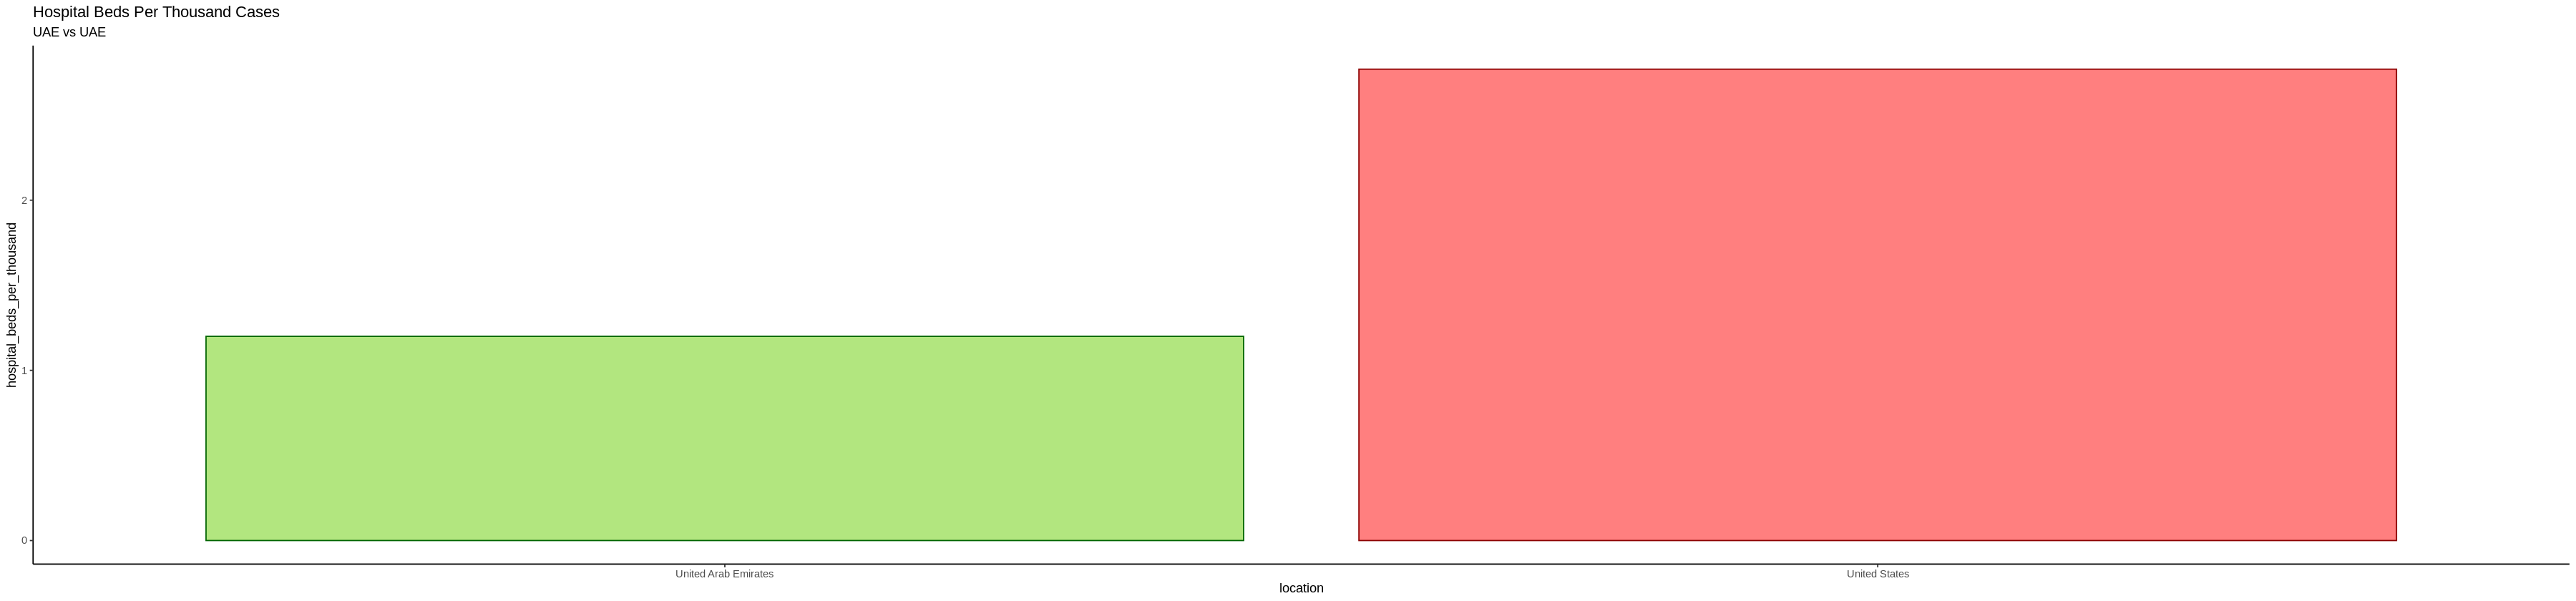

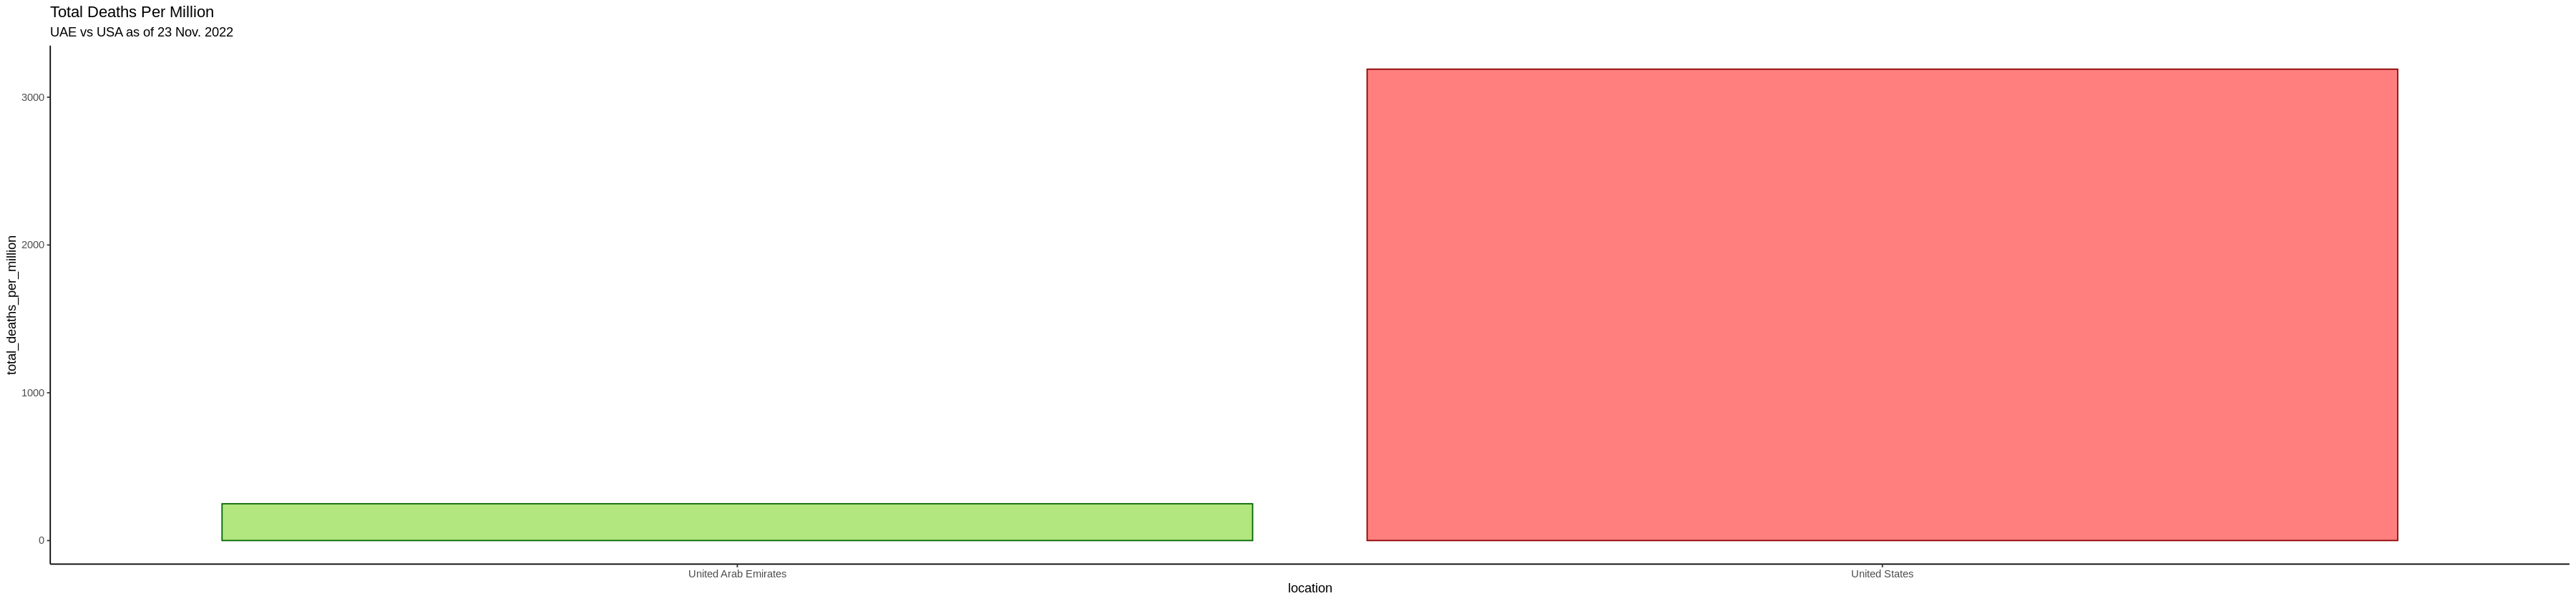

In [ ]:
par(mfrow=c(1,2))


vs %>%
  ggplot() +
    geom_col(aes(y = hospital_beds_per_thousand, x= location),  col=c("darkgreen", "darkred"), fill=c("chartreuse3", "red"),alpha=.5) +
    #geom_text(aes(label = hospital_beds_per_thousand), nudge_y = 10, size= 8) +       #why is there an error when I did the same thing for labels for all the other graphs and it worked??
    theme_classic() +
    ggtitle("Hospital Beds Per Thousand Cases")+
              labs(subtitle = "UAE vs UAE")

vs %>%
  ggplot() +
    geom_col(aes(y = total_deaths_per_million, x = location), col=c("darkgreen", "darkred"), fill=c("chartreuse3", "red"),alpha=.5) +
    theme_classic() +
    ggtitle("Total Deaths Per Million")+
    #geom_text(aes(label = round(total_deaths_per_million,0), nudge_y = 10, size= 8)) +              #same error here with the labels
              labs(subtitle = "UAE vs USA as of 23 Nov. 2022")

In [ ]:
#covid_csv %>% filter(location == "United States" | location == "United Arab Emirates")

In [ ]:
 p <- covid_csv %>% filter(date == "2020-06-29" | date == "2021-06-29" |date == "2022-06-29" ) %>%
  filter(location == "United States" | location == "United Arab Emirates") %>%
  select(continent, location, date, total_cases, new_cases, total_deaths) %>%
   mutate(mortality=round(total_deaths/total_cases*100,2))

p

continent,location,date,total_cases,new_cases,total_deaths,mortality
<chr>,<chr>,<date>,<int>,<int>,<int>,<dbl>
Asia,United Arab Emirates,2020-06-29,48246,449,314,0.65
Asia,United Arab Emirates,2021-06-29,631160,2184,1807,0.29
Asia,United Arab Emirates,2022-06-29,944022,1769,2315,0.25
North America,United States,2020-06-29,2598615,41550,126869,4.88
North America,United States,2021-06-29,33764989,7526,600488,1.78
North America,United States,2022-06-29,87525272,190272,1017927,1.16


In [ ]:
p$location <- factor(p$location)
p$date <- factor(p$date)

In [ ]:
str(p)

'data.frame':	6 obs. of  7 variables:
 $ continent   : chr  "Asia" "Asia" "Asia" "North America" ...
 $ location    : Factor w/ 2 levels "United Arab Emirates",..: 1 1 1 2 2 2
 $ date        : Factor w/ 3 levels "2020-06-29","2021-06-29",..: 1 2 3 1 2 3
 $ total_cases : int  48246 631160 944022 2598615 33764989 87525272
 $ new_cases   : int  449 2184 1769 41550 7526 190272
 $ total_deaths: int  314 1807 2315 126869 600488 1017927
 $ mortality   : num  0.65 0.29 0.25 4.88 1.78 1.16


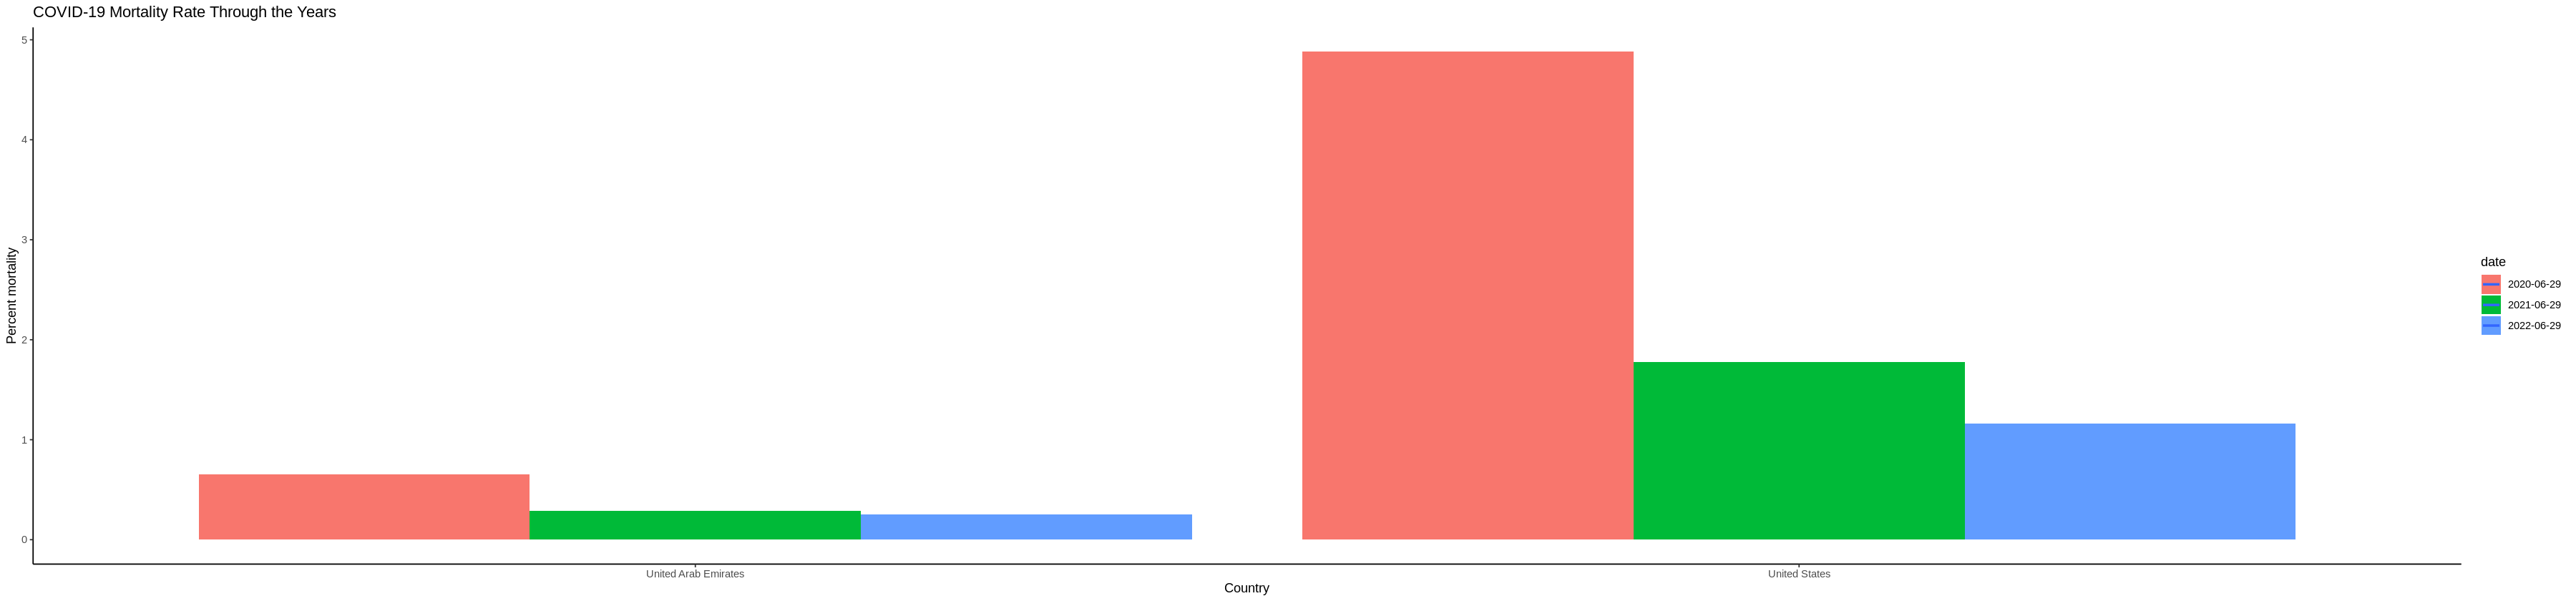

In [ ]:
p %>% ggplot(aes(x=factor(location), y=mortality, fill=date)) +
  geom_bar(stat = "identity", position="dodge") +
  labs(x="Country", y="Percent mortality") +
  ggtitle("COVID-19 Mortality Rate Through the Years") +
  theme_classic() +
  #geom_text(aes(label = date), nudge_y=3) +
  #geom_text(aes(label = mortality), nudge_y=3)              error: these labels are not going in the right spot.
   #geom_smooth(method = "lm", formula = y ~ poly(x, 3), se = FALSE)


We can see here that there is a clear decrease over the years on the same date (June 2020, June 2021, June 20232. Hopefullly next year, in June 2023, the bar will be much lower as well and keep following the trend.

Overall, in this project, I explored more into the COVID-19 dataset to see *what* happened, as well as try to find correlating reasons *why* by looking at other variables given in the data set such as vaccinations, hospital beds, and GDP per capita of the locations.

For example, in this report, we saw that as of November 24, 2022, the UAE had 1.20 hospital beds per thousand, whereas the USA had 2.77 beds per thousand. The UAEs population density is 112.442, and the USA’s is 35.608. Both are rich countries with UAE’s GDP per capita being about $67,000 and the UAE's being about $54,000. On the surface, it looks like it should be easier for the US to contain more of the pandemic by having more hospital beds and less population density to worry about people exposing each other. Surely, it's harder to contain a pandemic when people live closer to each other (a high population density). However, we can look at the number of vaccinations as one reason why. We see that countries in Asia have a much higher vaccination per hundred people than other continents, due to their different approaches towards encouraging vaccine. This is another reason why there are differences in recovery rates between regions.

#Errors

1. This is a failed attempt at a correlation matrix. I removed all teh NAs in the date frame so it would be able to compute but then it still gave mea  correlation mattrix with all NAs.  

In [ ]:
#failed attempt at a correlation matrix
df %>%
  na.omit() %>%
  select(-date, -continent, -location) %>%
  #cor(use = "complete.obs") %>%
  cor()

,total_cases,total_deaths,tests_per_case,people_fully_vaccinated,total_vaccinations_per_hundred,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,population
total_cases,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
total_deaths,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
tests_per_case,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
people_fully_vaccinated,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
total_vaccinations_per_hundred,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
population_density,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
median_age,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
aged_65_older,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
gdp_per_capita,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
extreme_poverty,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


2. Time graph of new cases per day per continent.


`summarise()` has grouped output by 'continent', 'date'. You can override using
the `.groups` argument.
`geom_smooth()` using formula = 'y ~ x'


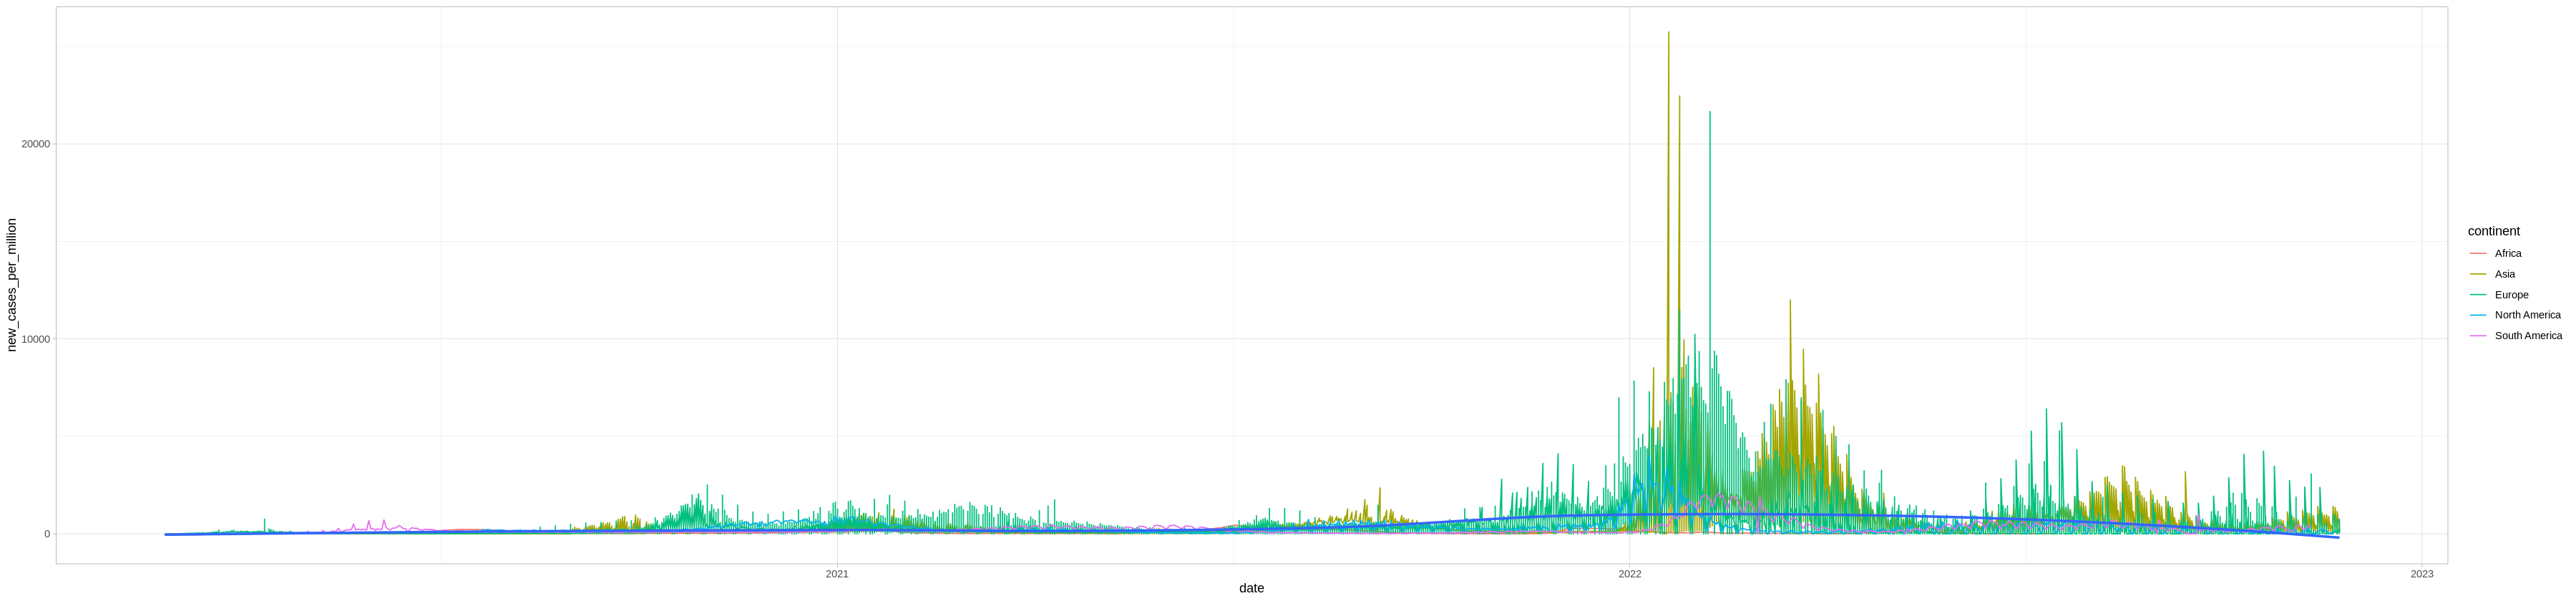

In [ ]:
#time graph of new cases per day per continent
options(repr.plot.width=30)


covid_csv %>%
  select(continent, location, date, new_cases_per_million,
        icu_patients_per_million,weekly_hosp_admissions_per_million) %>%
          na.omit() %>%
           filter(continent!="") %>%
          #arrange(desc(new_cases_per_million)) %>%
          #top_n(n=5) %>%
          group_by(continent,date) %>%
         summarize(continent, new_cases_per_million) %>%
          ggplot(aes(x=date, y= new_cases_per_million)) +
              geom_line(aes(color = continent)) +
              geom_smooth(method = "loess") +
              theme_light()


This graph is a nice start but is overall pretty hard to read other than seeing there was a large spike in cases in the begging of 2022. However, I am doubting this graph because it doesn't make sense that there would be a peak of new cases per day in 2022 over there being a peak in 2020 when the pandemic first started.

3. Facet wrap

In [ ]:
#Facet wrap
g <- covid_csv %>%
  select(date, continent, total_cases, total_deaths) %>%
  filter(continent!="") %>%
  na.omit() %>%
  ggplot(aes(x = date, y = total_cases)) +
  geom_point(aes(color = continent, group = continent)) +
  theme_bw()


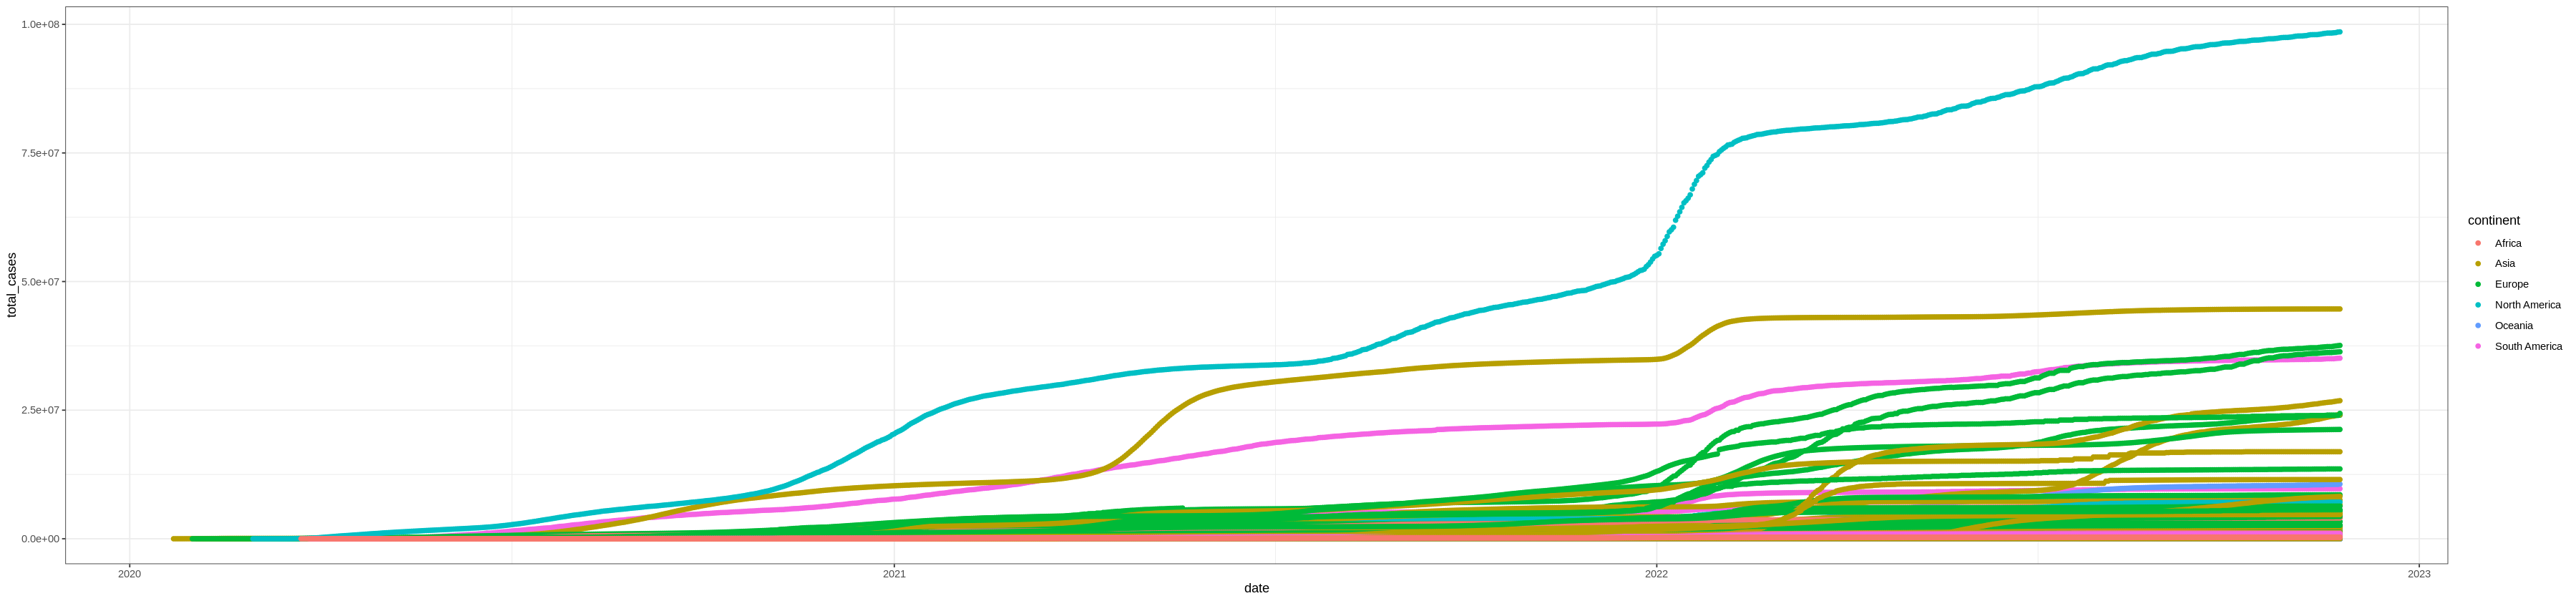

In [ ]:
g

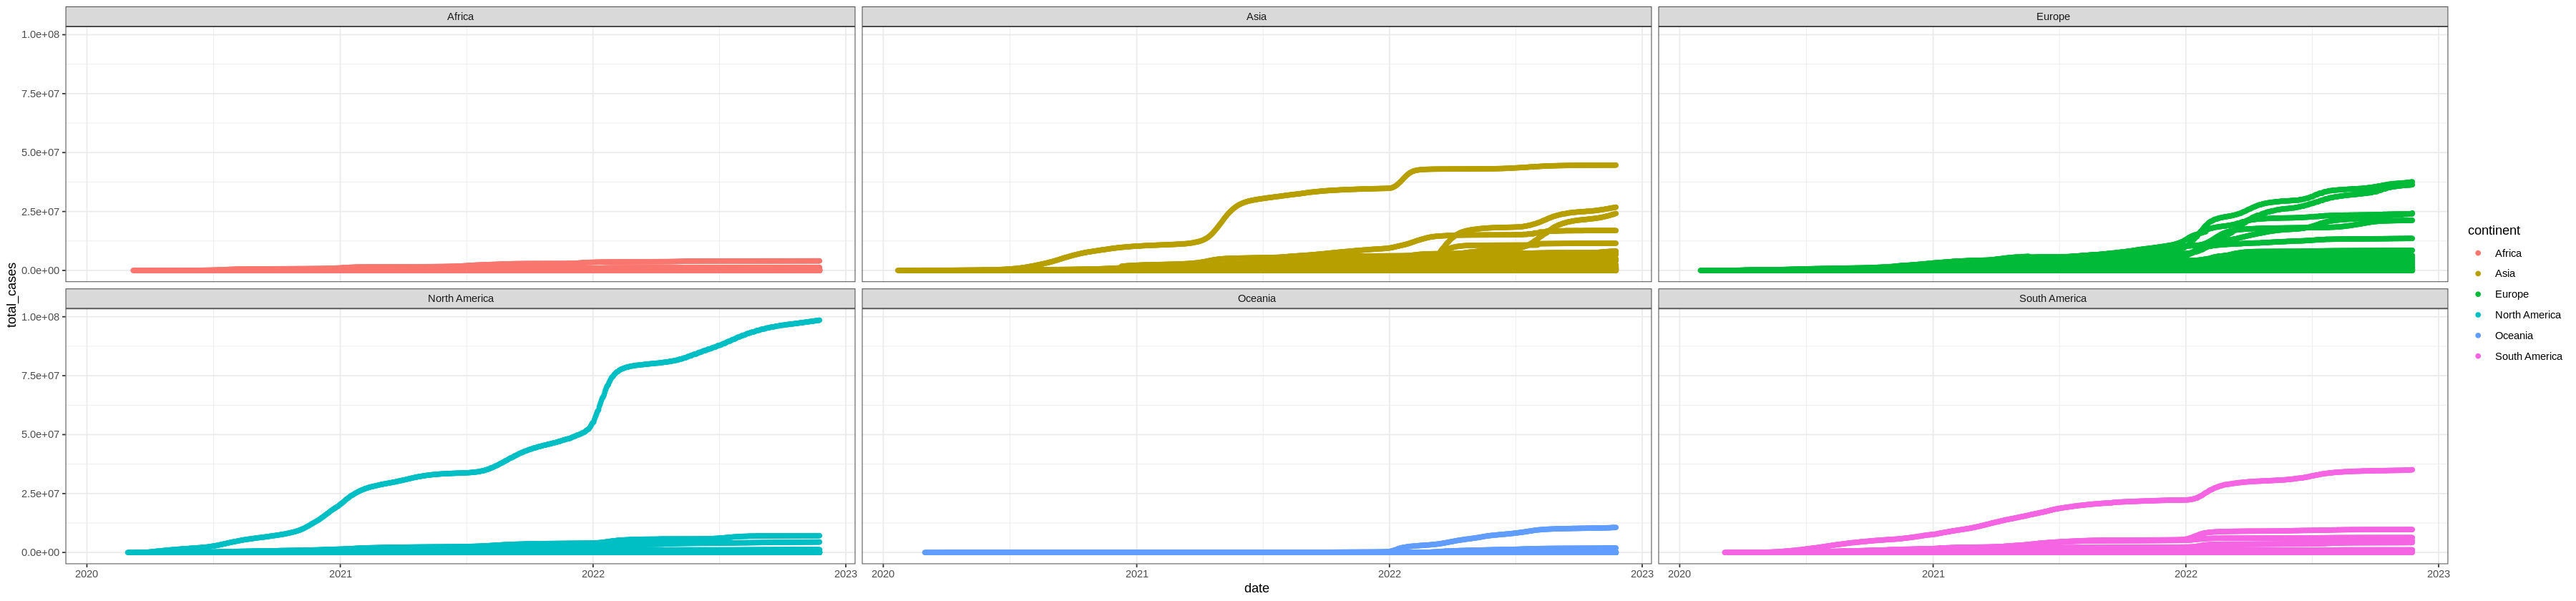

In [ ]:
covid_csv$continent <- factor(covid_csv$continent)
g + facet_wrap(~continent)


I do not know why there are multiple lines on each continent's facet. I like the idea of using a facet wrap but it needs more information. I believe if the data was properly long instead of wide It would be able to facet better.

In [ ]:
?facet_wrap

4. Data

One important thing to note is that when dealing with data from all around the world, there are bound to be reporting differences between governments, as well as accessibility and funding to proper data collection. This certainly has an impact on the data and we must take these results with a grain of salt.

#**Reflecting**

  When comparing this project with the first EDA I did with a partner in DSC 101 in November 2021, I can definitely see some improvements as well as some themes. I feel like I spent a lot of time on data cleaning and manipulating, which is a part of data science that I like. One large difference I see between the two projects is that this time around, I did a lot less manually. I used variable names and code to do just about everything and didn't manually type a lot, so it was as automated as possible. In my first project, there were many times when I/we had to hard-code a player's name or some data because we couldn't figure out how to get past an error.  

  One theme/similarity I see is the struggle with the graphs and translating what idea I have in my head to in code. However, there is an improvement in knowledge of other concepts such as correlation matrix and facet wrap that I tried to experiment with in this project, which the Aisha of November 2021 had no idea about.  
  
  I also see a significant difference in how I use a lot more Tidyverse now. I see the effects of my summer internship, where I used Tidyverse heavily, bleed into my work. As mentioned before, I truly do feel like someone who is learning and switches constantly different dialects of the same language (here, base R and Tidyverse - and concepts of Python too). However, I suppose that is one thing valuable about any programmer; their ability to have different perspectives. It's harder to switch from back and forth, and it takes a few extra seconds to Google '____ in R' really quickly just to remember the proper exact syntax, but it's worth it.

  One thing I want to work on in the future is having a clear storyline with "beginning", "middle", and "end" for my projects, as well as being more organized with the notebook. I want to be more direct and clear. It's hard for me to declutter right now.

  Overall, I am happy to have learned more about exploratory data analysis methods, techniques, and R coding, and hope to keep learning more and apply it.

# **References**

***Dataset***


Edouard Mathieu, Hannah Ritchie, Lucas Rodés-Guirao, Cameron Appel, Charlie Giattino, Joe Hasell, Bobbie Macdonald, Saloni Dattani, Diana Beltekian, Esteban Ortiz-Ospina and Max Roser (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/coronavirus' [Online Resource]  
(accessed via GitHub: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv)




***COVID-19 statistics***


“Who coronavirus (COVID-19) dashboard,” World Health Organization. [Online]. Available: https://covid19.who.int/. [Accessed: 02-Dec-2022].


Thank you for reading and for your time!